In [ ]:
# validation set이 필요한 이유
  # 1) parameter 조정 과정이 필요 (실제 테스트 전에 모의고사 함 더)
      # 머신러닝모델의 사전 성능 검증 & 성능 증진
      # 학습에 관여를 할 뿐, 직접 학습을 시키는 것은 아님
  # 2) 연관된 skill: k - fold cross validation
      # 모델 성능의 '평균값' 도출
      # 의의1: 당장 학습량을 줄지만 더 정교한 모델 구축 가능
      # 의의2: Overfitting 방지 
      # 의의3: 모델의 일반화 성능 추정 

# Attrition Prediction

In [ ]:
# convert to html
%%shell
jupyter nbconvert --to html /content/2022_05_30_Attrition_Prediction.ipynb

[NbConvertApp] Converting notebook /content/2022_05_30_Attrition_Prediction.ipynb to html
/usr/local/lib/python3.7/dist-packages/nbconvert/filters/datatypefilter.py:41: UserWarning: Your element with mimetype(s) dict_keys(['application/vnd.colab-display-data+json']) is not able to be represented.
  mimetypes=output.keys())
[NbConvertApp] Writing 1887949 bytes to /content/2022_05_30_Attrition_Prediction.html


File Upload

In [ ]:
from google.colab import files
files.upload()

Saving ibm_hr_attrition.csv to ibm_hr_attrition.csv


{'ibm_hr_attrition.csv': b'\xef\xbb\xbfAge,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager\r\n41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5\r\n49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7\r\n37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0

In [ ]:
# 데이터 전처리 
import pandas as pd 
import numpy as np
# 데이터 시각화 
import seaborn as sns # 시각화  
import matplotlib.pyplot as plt #그래프 옵션 (그래프 사이즈, 범례...) 
import matplotlib as mpl # 글꼴설정 /음수값 처리 
import scipy.stats as stats # 가설 검정 

from IPython.display import set_matplotlib_formats # Jupyter Notebook에서 글꼴 선명하게 

In [ ]:
# e 출력 없애기
np.set_printoptions(precision=6, suppress=True)
pd.options.display.float_format = '{:.5f}'.format
pd.reset_option('display.float_format')

# df1 def.

In [ ]:
df1 = pd.read_csv('ibm_hr_attrition.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
import pandas_profiling as pp

pp.ProfileReport(df1).to_file('attrition_rawdata_report.html')

Summarize dataset:   0%|          | 0/47 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\soohy\anaconda3\lib\site-packages\pandas_profiling\visualisation\plot.py:166: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Statistical Describe, Visualization, Exploration

In [ ]:
df1.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df1.Attrition.value_counts()
# (normalize = True)

No     1233
Yes     237
Name: Attrition, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


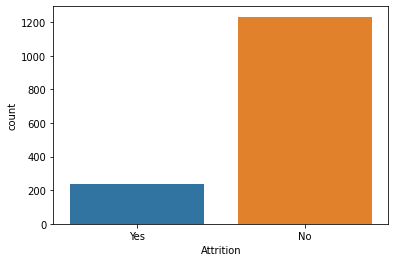

In [ ]:
sns.countplot(df1.Attrition)

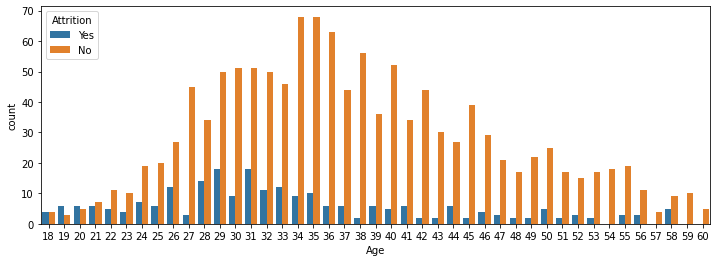

In [ ]:
# Show the number of employees that left and stayed by age
plt.figure(figsize = (12, 4))
sns.countplot(x = 'Age', hue = 'Attrition', data = df1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00696e2510>,
      dtype=object)

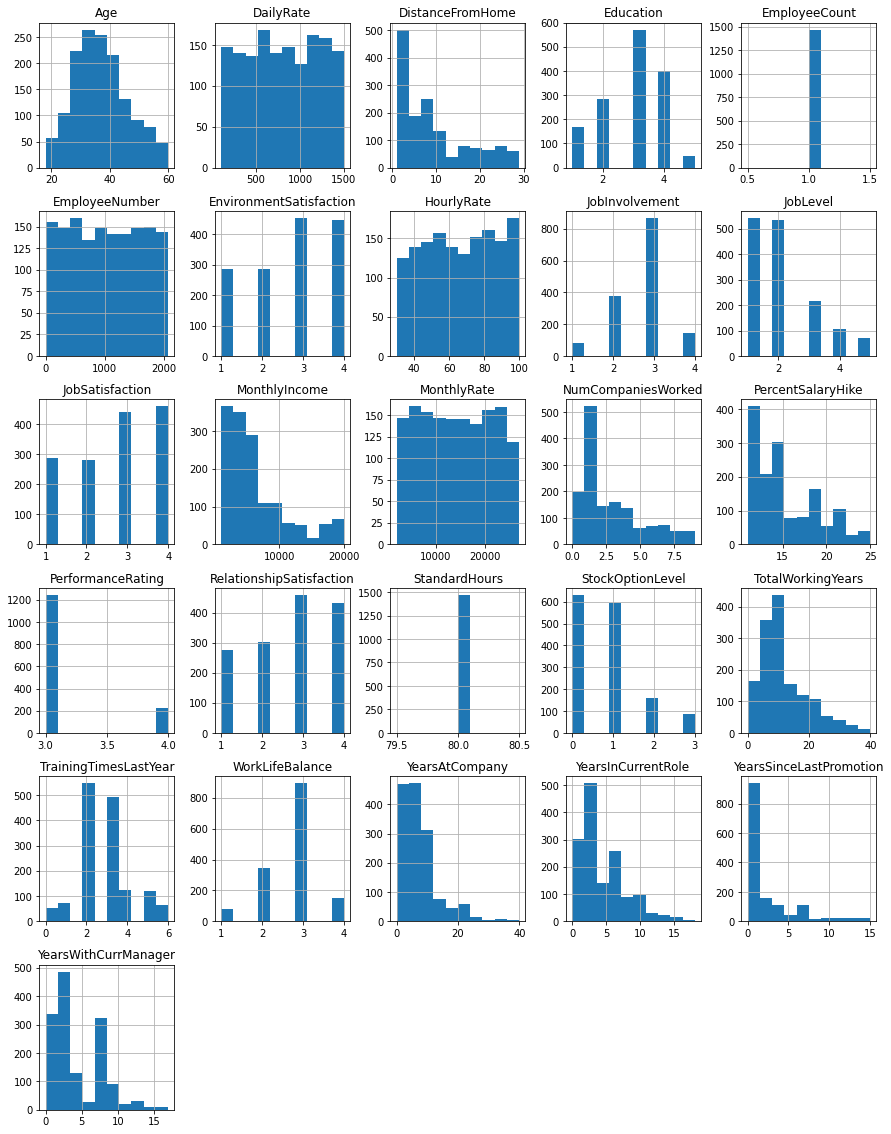

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df1.hist(ax = ax)

In [ ]:
len(df1.describe(include = int).T.reset_index()['index'].to_list())

26

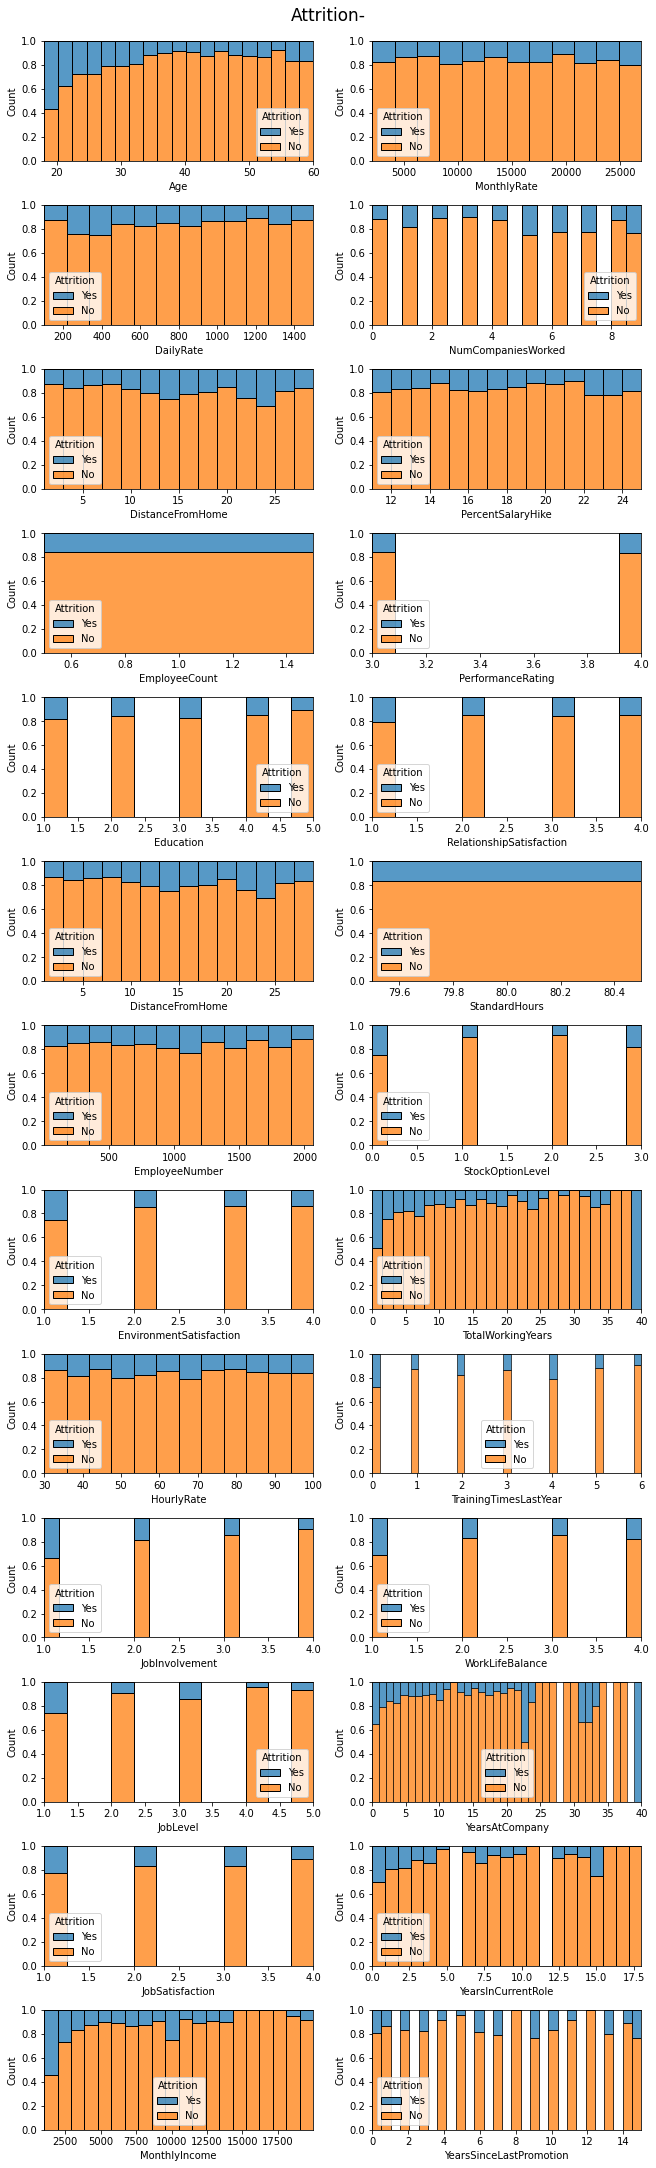

In [ ]:
fig, ax = plt.subplots(13, 2, figsize = (9, 30), constrained_layout = True)
fig.suptitle('Attrition-', fontsize = 17)

sns.histplot(ax = ax[(0,0)], data= df1, x = 'Age', hue = 'Attrition', multiple = 'fill')
sns.histplot(ax = ax[(1,0)], data= df1, x = 'DailyRate', hue = 'Attrition', multiple = 'fill')
sns.histplot(ax = ax[(2,0)], data= df1, x = 'DistanceFromHome', hue = 'Attrition', multiple = 'fill')
sns.histplot(ax = ax[(3,0)], data= df1, x = 'EmployeeCount', hue = 'Attrition', multiple = 'fill')
sns.histplot(ax = ax[(4,0)], data= df1, x = 'Education', hue = 'Attrition', multiple = 'fill')
sns.histplot(ax = ax[(5,0)], data= df1, x = 'DistanceFromHome', hue = 'Attrition', multiple = 'fill')
sns.histplot(ax = ax[(6,0)], data= df1, x = 'EmployeeNumber', hue = 'Attrition', multiple = 'fill')
sns.histplot(ax = ax[(7,0)], data= df1, x = 'EnvironmentSatisfaction', hue = 'Attrition', multiple = 'fill')
sns.histplot(ax = ax[(8,0)], data= df1, x = 'HourlyRate', hue = 'Attrition', multiple = 'fill')
sns.histplot(ax = ax[(9,0)], data= df1, x = 'JobInvolvement', hue = 'Attrition', multiple = 'fill')
sns.histplot(ax = ax[(10,0)], data= df1, x = 'JobLevel', hue = 'Attrition', multiple = 'fill')
sns.histplot(ax = ax[(11,0)], data= df1, x = 'JobSatisfaction', hue = 'Attrition', multiple = 'fill')
sns.histplot(ax = ax[(12,0)], data= df1, x = 'MonthlyIncome', hue = 'Attrition', multiple = 'fill')
sns.histplot(ax = ax[(0,1)], data= df1, x = 'MonthlyRate', hue = 'Attrition', multiple = 'fill')
sns.histplot(ax = ax[(1,1)], data= df1, x = 'NumCompaniesWorked', hue = 'Attrition', multiple = 'fill')
sns.histplot(ax = ax[(2,1)], data= df1, x = 'PercentSalaryHike', hue = 'Attrition', multiple = 'fill')
sns.histplot(ax = ax[(3,1)], data= df1, x = 'PerformanceRating', hue = 'Attrition', multiple = 'fill')
sns.histplot(ax = ax[(4,1)], data= df1, x = 'RelationshipSatisfaction', hue = 'Attrition', multiple = 'fill')
sns.histplot(ax = ax[(5,1)], data= df1, x = 'StandardHours', hue = 'Attrition', multiple = 'fill')
sns.histplot(ax = ax[(6,1)], data= df1, x = 'StockOptionLevel', hue = 'Attrition', multiple = 'fill')
sns.histplot(ax = ax[(7,1)], data= df1, x = 'TotalWorkingYears', hue = 'Attrition', multiple = 'fill')
sns.histplot(ax = ax[(8,1)], data= df1, x = 'TrainingTimesLastYear', hue = 'Attrition', multiple = 'fill')
sns.histplot(ax = ax[(9,1)], data= df1, x = 'WorkLifeBalance', hue = 'Attrition', multiple = 'fill')
sns.histplot(ax = ax[(10,1)], data= df1, x = 'YearsAtCompany', hue = 'Attrition', multiple = 'fill')
sns.histplot(ax = ax[(11,1)], data= df1, x = 'YearsInCurrentRole', hue = 'Attrition', multiple = 'fill')
sns.histplot(ax = ax[(12,1)], data= df1, x = 'YearsSinceLastPromotion', hue = 'Attrition', multiple = 'fill')

In [ ]:
# Get the correlation
df1.corr()

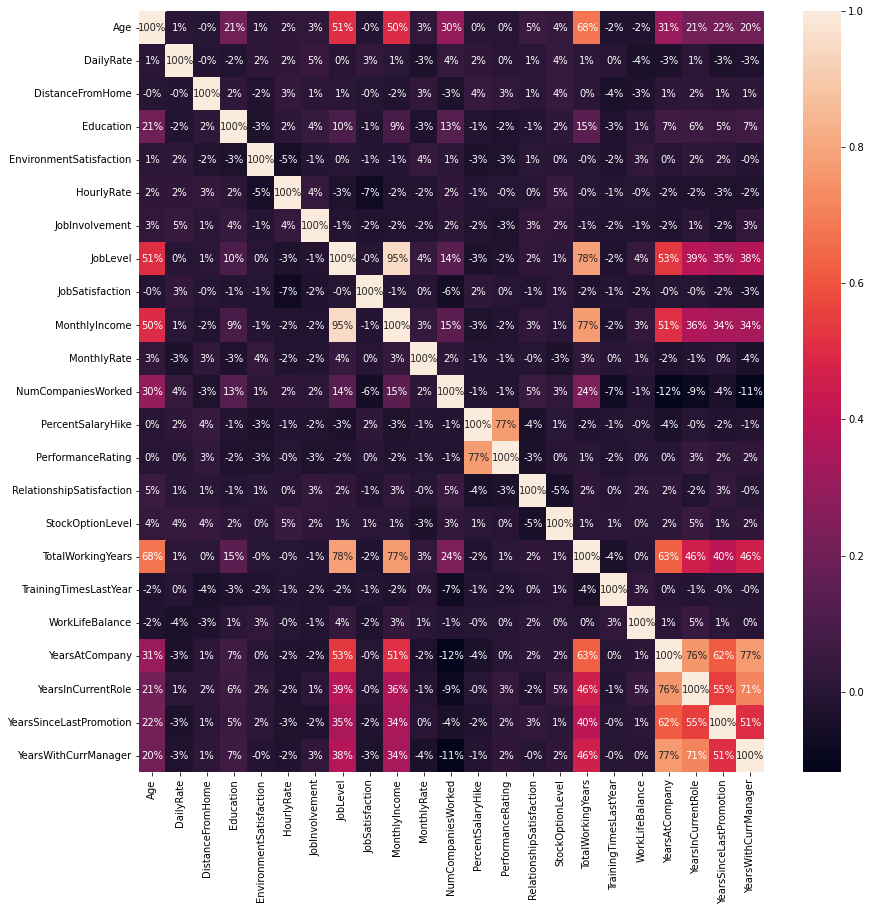

In [ ]:
# Visualization 
plt.figure(figsize = (14, 14))
sns.heatmap(df1.corr(), annot = True, fmt = '.0%')

## Transform the data (Num<->Cat) LabelEncoder


In [ ]:
# Remove some usless columns
df1 = df1.drop(['Over18', 'EmployeeNumber', 'StandardHours', 'EmployeeCount'], axis = 1)

In [ ]:
# Transform non-numerical into numerical col
from sklearn.preprocessing import LabelEncoder

for column in df1.columns:
  if df1[column].dtype == np.number:
    continue
  df1[column] = LabelEncoder().fit_transform(df1[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  """


In [ ]:
# Version2 - Y: number, X: let it be.. Transform non-numerical into numerical col
from sklearn.preprocessing import LabelEncoder
df1['Attrition']= LabelEncoder().fit_transform(df1['Attrition'])

In [ ]:
df1 = df1[['Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Age']]

## Transform the data (Num<->Cat) OneHotEncoding;Dummies


In [ ]:
# dummy로 넣는거보다 label encoder가 성능이 좋았다. (Decision Tree의 경우, 다른 조건 모두 같음)

In [ ]:
df1 = pd.get_dummies(df1)

# RandomForest

## RandomForest (Baseline)

In [ ]:
# 트리모델에서는 2개 초과의 범주형 카테고리에도 label encoder 쓸 수 있다.
# 다른 모델의 경우 one-hot encoding 써야 함.

In [ ]:
# LabelEncoder
  # Transform non-numerical into numerical col
from sklearn.preprocessing import LabelEncoder

for column in df1.columns:
  if df1[column].dtype == np.number:
    continue
  df1[column] = LabelEncoder().fit_transform(df1[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  


In [ ]:
# 학습에 사용될 알고리즘 
from sklearn.tree     import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# 학습/검증 데이터 분할 / 매개변수 튜닝 / 교차검증 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# 평가 
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:
# Split the data
X = df1.drop(columns = ['Attrition'])
Y = df1['Attrition']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, 
                                                    random_state = 0)

In [ ]:
forest = RandomForestClassifier(random_state = 0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# Get the accuracy on the training data set 
print("Accuracy: {:.3f}".format(forest.score(X_train, y_train)))
# Get the accuracy on the test data set 
print("Accuracy: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy: 1.000
Accuracy: 0.862


In [ ]:
forest.get_params()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_pred = forest.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[368   3]
 [ 58  12]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       371
           1       0.80      0.17      0.28        70

    accuracy                           0.86       441
   macro avg       0.83      0.58      0.60       441
weighted avg       0.85      0.86      0.82       441



## RandomForest (Preprocessing - Feature adjustment)

In [ ]:
df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
# Remove some usless columns - based on EDA and LogisticRegression Summary - ver1
df1 = df1.drop(['Over18', 'EmployeeNumber', 'StandardHours', 'EmployeeCount',
                'EducationField', 'DailyRate', 'MonthlyRate', 'PerformanceRating'], axis = 1)

In [ ]:
# spliting (5:5 - at the best performance)

# Split the data
X = df1.drop(columns = ['Attrition'])
Y = df1['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.5, 
                                                    random_state = 0)
# Model Building
forest = RandomForestClassifier(random_state = 0)
forest.fit(X_train, y_train)
# Get the accuracy on the training data set 
print("Accuracy: {:.3f}".format(forest.score(X_train, y_train)))
# Get the accuracy on the test data set 
print("Accuracy: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy: 1.000
Accuracy: 0.872


#### <<0.875>>

In [ ]:
# Remove some usless columns - based on EDA and LogisticRegression Summary - ver2
df1 = df1.drop(['Over18', 'EmployeeNumber', 'StandardHours', 'EmployeeCount',
                'EducationField', 'DailyRate', 'MonthlyRate', 'HourlyRate','PerformanceRating'], axis = 1)

In [ ]:
# spliting (5:5 - at the best performance)

# Split the data
X = df1.drop(columns = ['Attrition'])
Y = df1['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.5, 
                                                    random_state = 0)
# Model Building
forest = RandomForestClassifier(random_state = 0)
forest.fit(X_train, y_train)
# Get the accuracy on the training data set 
print("Accuracy: {:.3f}".format(forest.score(X_train, y_train)))
# Get the accuracy on the test data set 
print("Accuracy: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy: 1.000
Accuracy: 0.875


In [ ]:
# Remove some usless columns - based on EDA and LogisticRegression Summary - ver3
df1 = df1.drop(['Over18', 'EmployeeNumber', 'StandardHours', 'EmployeeCount',
                'EducationField', 'DailyRate', 'MonthlyRate', 'HourlyRate','PerformanceRating',
                'StockOptionLevel'], axis = 1)

In [ ]:
# spliting (5:5 - at the best performance)

# Split the data
X = df1.drop(columns = ['Attrition'])
Y = df1['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.5, 
                                                    random_state = 0)
# Model Building
forest = RandomForestClassifier(random_state = 0)
forest.fit(X_train, y_train)
# Get the accuracy on the training data set 
print("Accuracy: {:.3f}".format(forest.score(X_train, y_train)))
# Get the accuracy on the test data set 
print("Accuracy: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy: 1.000
Accuracy: 0.867


In [ ]:
# Remove some usless columns - based on EDA and LogisticRegression Summary - ver4
df1 = df1.drop(['Over18', 'EmployeeNumber', 'StandardHours', 'EmployeeCount',
                'EducationField', 'DailyRate', 'MonthlyRate', 'HourlyRate','PerformanceRating',
                'PercentSalaryHike', 'MonthlyIncome', 'JobLevel'], axis = 1)

In [ ]:
# spliting (5:5 - at the best performance)

# Split the data
X = df1.drop(columns = ['Attrition'])
Y = df1['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.5, 
                                                    random_state = 0)
# Model Building
forest = RandomForestClassifier(random_state = 0)
forest.fit(X_train, y_train)
# Get the accuracy on the training data set 
print("Accuracy: {:.3f}".format(forest.score(X_train, y_train)))
# Get the accuracy on the test data set 
print("Accuracy: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy: 1.000
Accuracy: 0.867


## RandomForest (Preprocessing - Feature adjustment + Not label, dummies --> Not enhanced)

In [ ]:
# Remove some usless columns - based on EDA and LogisticRegression Summary - ver2 + Dummies, not label
df1 = df1.drop(['Over18', 'EmployeeNumber', 'StandardHours', 'EmployeeCount',
                'EducationField', 'DailyRate', 'MonthlyRate', 'HourlyRate','PerformanceRating'], axis = 1)

In [ ]:
X = df1.drop(columns = ['Attrition'])
Y = df1['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.5, 
                                                    random_state = 0)

In [ ]:
# spliting (5:5 - at the best performance)

# Split the data
# X = df1.drop(columns = ['Attrition'])
# Y = df1['Attrition']
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.5, 
                                                    #random_state = 0)

# Preprocessing - Dummies for X_train, y_train
X_train = pd.get_dummies(X_train, dtype='int64')
X_test = pd.get_dummies(X_test, dtype='int64')

# Model Building
forest = RandomForestClassifier(random_state = 0)
forest.fit(X_train, y_train)
# Get the accuracy on the training data set 
print("Accuracy: {:.3f}".format(forest.score(X_train, y_train)))
# Get the accuracy on the test data set 
print("Accuracy: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy: 1.000
Accuracy: 0.867


## RandomForest (Preprocessing - K-fold cross validation)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import numpy as np

In [ ]:
dt_clf = RandomForestClassifier(random_state=156)

In [ ]:
# Split the data
X = df1.drop(columns = ['Attrition'])
y = df1['Attrition']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = 0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1029, 34)
(441, 34)
(1029,)
(441,)


#### K-fold 5, 7:3, baseline

In [ ]:
accuracy_history = []
kfold = KFold(n_splits=5, shuffle = True, random_state = 1)

# K-fold 검증 과정으로 실제 랜덤 포레스트 모델을 학습하여 정확도 평균을 내는 방법
for train_index, test_index in kfold.split(X):

    # X_train, X_test = X[train_index], X[test_index] 
    # y_train, y_test = y[train_index], y[test_index]

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Model Building
    forest = RandomForestClassifier(random_state = 0)
    forest.fit(X_train, y_train) # train model

    y_pred = forest.predict(X_test) # 예측 라벨
    accuracy_history.append(accuracy_score(y_pred, y_test)) # 정확도 측정 및 기록

print("각 분할의 정확도 기록 :", accuracy_history)
print("평균 정확도 :", np.mean(accuracy_history))

# 출력 결과
# 각 분할의 정확도 기록 : [0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9]
# 평균 정확도 : 0.96

각 분할의 정확도 기록 : [0.8367346938775511, 0.8571428571428571, 0.8741496598639455, 0.8707482993197279, 0.8469387755102041]
평균 정확도 : 0.8571428571428571


#### k-fold 5, 5:5, baseline

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, 
                                                    random_state = 0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(735, 34)
(735, 34)
(735,)
(735,)


In [ ]:
accuracy_history = []
kfold = KFold(n_splits=5, shuffle = True, random_state = 1)

# K-fold 검증 과정으로 실제 랜덤 포레스트 모델을 학습하여 정확도 평균을 내는 방법
for train_index, test_index in kfold.split(X):

    # X_train, X_test = X[train_index], X[test_index] 
    # y_train, y_test = y[train_index], y[test_index]

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Model Building
    forest = RandomForestClassifier(random_state = 0)
    forest.fit(X_train, y_train) # train model

    y_pred = forest.predict(X_test) # 예측 라벨
    accuracy_history.append(accuracy_score(y_pred, y_test)) # 정확도 측정 및 기록

print("각 분할의 정확도 기록 :", accuracy_history)
print("평균 정확도 :", np.mean(accuracy_history))

각 분할의 정확도 기록 : [0.8367346938775511, 0.8571428571428571, 0.8741496598639455, 0.8707482993197279, 0.8469387755102041]
평균 정확도 : 0.8571428571428571


In [ ]:
from sklearn.model_selection import StratifiedKFold

# split 개수, 셔플 여부 및 seed 설정
str_kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 50)

# split 개수 스텝 만큼 train, test 데이터셋을 매번 분할
for train_index, test_index in str_kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Model Building
    forest = RandomForestClassifier(random_state = 0)
    forest.fit(X_train, y_train) # train model

    y_pred = forest.predict(X_test) # 예측 라벨
    accuracy_history.append(accuracy_score(y_pred, y_test)) # 정확도 측정 및 기록

print("각 분할의 정확도 기록 :", accuracy_history)
print("평균 정확도 :", np.mean(accuracy_history))

각 분할의 정확도 기록 : [0.8367346938775511, 0.8571428571428571, 0.8741496598639455, 0.8707482993197279, 0.8469387755102041, 0.8741496598639455, 0.8367346938775511, 0.8639455782312925, 0.8707482993197279, 0.8503401360544217]
평균 정확도 : 0.8581632653061224


## RandomForest (Preprocessing - Data spliting ratio)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.6, 
                                                    random_state = 0)
# Model Building
forest = RandomForestClassifier(random_state = 0)
forest.fit(X_train, y_train)
# Get the accuracy on the training data set 
print("Accuracy: {:.3f}".format(forest.score(X_train, y_train)))
# Get the accuracy on the test data set 
print("Accuracy: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy: 1.000
Accuracy: 0.865


#### test ratio 0.5 <<0.875>>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.55, 
                                                    random_state = 0)
# Model Building
forest = RandomForestClassifier(random_state = 0)
forest.fit(X_train, y_train)
# Get the accuracy on the training data set 
print("Accuracy: {:.3f}".format(forest.score(X_train, y_train)))
# Get the accuracy on the test data set 
print("Accuracy: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy: 1.000
Accuracy: 0.865


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.5, 
                                                    random_state = 0)
# Model Building
forest = RandomForestClassifier(random_state = 0)
forest.fit(X_train, y_train)
# Get the accuracy on the training data set 
print("Accuracy: {:.3f}".format(forest.score(X_train, y_train)))
# Get the accuracy on the test data set 
print("Accuracy: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy: 1.000
Accuracy: 0.875


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, 
                                                    random_state = 0)
# Model Building
forest = RandomForestClassifier(random_state = 0)
forest.fit(X_train, y_train)
# Get the accuracy on the training data set 
print("Accuracy: {:.3f}".format(forest.score(X_train, y_train)))
# Get the accuracy on the test data set 
print("Accuracy: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy: 1.000
Accuracy: 0.867


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, 
                                                    random_state = 0)
# Model Building
forest = RandomForestClassifier(random_state = 0)
forest.fit(X_train, y_train)
# Get the accuracy on the training data set 
print("Accuracy: {:.3f}".format(forest.score(X_train, y_train)))
# Get the accuracy on the test data set 
print("Accuracy: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy: 1.000
Accuracy: 0.862


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, 
                                                    random_state = 0)
# Model Building
forest = RandomForestClassifier(random_state = 0)
forest.fit(X_train, y_train)
# Get the accuracy on the training data set 
print("Accuracy: {:.3f}".format(forest.score(X_train, y_train)))
# Get the accuracy on the test data set 
print("Accuracy: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy: 1.000
Accuracy: 0.861


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, 
                                                    random_state = 0)
# Model Building
forest = RandomForestClassifier(random_state = 0)
forest.fit(X_train, y_train)
# Get the accuracy on the training data set 
print("Accuracy: {:.3f}".format(forest.score(X_train, y_train)))
# Get the accuracy on the test data set 
print("Accuracy: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy: 1.000
Accuracy: 0.840


## RandomForest (Hyperparameter Tuning - RandomizedSearchCV)

In [ ]:
# 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
estimator = RandomForestClassifier()

In [ ]:
para_depth = [depth for depth in range(10,21)] 
para_split = [n_split * 10 for n_split in range(1,4)]
para_leaf = [n_leaf * 2 for n_leaf in range(1,4)]

param_grid = {'max_depth':para_depth, 'min_samples_split': para_split,
              'min_samples_leaf': para_leaf}
            
grid_dt = RandomizedSearchCV(estimator, param_grid, scoring = 'accuracy', n_jobs = -1)
grid_dt.fit(X_train, y_train)

print("Best parameter model: \n{}".format(grid_dt.best_estimator_))
print("Best parameter: \n{}".format(grid_dt.best_params_))
print("Best score: \n{}".format(grid_dt.best_score_.round(3)))

Best parameter model: 
RandomForestClassifier(max_depth=17, min_samples_leaf=2, min_samples_split=10)
Best parameter: 
{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 17}
Best score: 
0.854


In [ ]:
para_depth = [depth for depth in range(10,40)] 
para_split = [n_split * 10 for n_split in range(1,4)]
para_leaf = [n_leaf * 2 for n_leaf in range(1,4)]

param_grid = {'max_depth':para_depth, 'min_samples_split': para_split,
              'min_samples_leaf': para_leaf}
            
grid_dt = RandomizedSearchCV(estimator, param_grid, scoring = 'accuracy', n_jobs = -1)
grid_dt.fit(X_train, y_train)

print("Best parameter model: \n{}".format(grid_dt.best_estimator_))
print("Best parameter: \n{}".format(grid_dt.best_params_))
print("Best score: \n{}".format(grid_dt.best_score_.round(3)))

Best parameter model: 
RandomForestClassifier(max_depth=27, min_samples_leaf=2, min_samples_split=10)
Best parameter: 
{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 27}
Best score: 
0.853


In [ ]:
para_depth = [depth for depth in range(10,50)] 
para_split = [n_split * 10 for n_split in range(1,5)]
para_leaf = [n_leaf * 2 for n_leaf in range(1,10)]

param_grid = {'max_depth':para_depth, 'min_samples_split': para_split,
              'min_samples_leaf': para_leaf}
            
grid_dt = RandomizedSearchCV(estimator, param_grid, scoring = 'accuracy', n_jobs = -1)
grid_dt.fit(X_train, y_train)

print("Best parameter model: \n{}".format(grid_dt.best_estimator_))
print("Best parameter: \n{}".format(grid_dt.best_params_))
print("Best score: \n{}".format(grid_dt.best_score_.round(3)))

Best parameter model: 
RandomForestClassifier(max_depth=44, min_samples_leaf=6, min_samples_split=20)
Best parameter: 
{'min_samples_split': 20, 'min_samples_leaf': 6, 'max_depth': 44}
Best score: 
0.848


In [ ]:
para_depth = [depth for depth in range(1,11)] 
para_split = [n_split * 10 for n_split in range(1,6)]
para_leaf = [n_leaf * 2 for n_leaf in range(1,10)]

param_grid = {'max_depth':para_depth, 'min_samples_split': para_split,
              'min_samples_leaf': para_leaf}
            
grid_dt = RandomizedSearchCV(estimator, param_grid, scoring = 'accuracy', n_jobs = -1)
grid_dt.fit(X_train, y_train)

print("Best parameter model: \n{}".format(grid_dt.best_estimator_))
print("Best parameter: \n{}".format(grid_dt.best_params_))
print("Best score: \n{}".format(grid_dt.best_score_.round(3)))

Best parameter model: 
RandomForestClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=20)
Best parameter: 
{'min_samples_split': 20, 'min_samples_leaf': 4, 'max_depth': 7}
Best score: 
0.847


In [ ]:
para_depth = [depth for depth in range(50,100)] 
para_split = [n_split * 10 for n_split in range(1,11)]
para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

param_grid = {'max_depth':para_depth, 'min_samples_split': para_split,
              'min_samples_leaf': para_leaf}
            
grid_dt = RandomizedSearchCV(estimator, param_grid, scoring = 'accuracy', n_jobs = -1)
grid_dt.fit(X_train, y_train)

print("Best parameter model: \n{}".format(grid_dt.best_estimator_))
print("Best parameter: \n{}".format(grid_dt.best_params_))
print("Best score: \n{}".format(grid_dt.best_score_.round(3)))

Best parameter model: 
RandomForestClassifier(max_depth=79, min_samples_leaf=8, min_samples_split=20)
Best parameter: 
{'min_samples_split': 20, 'min_samples_leaf': 8, 'max_depth': 79}
Best score: 
0.849


## RandomForest (Hyperparameter Tuning - GridSearchCV)

In [ ]:
para_depth = [depth for depth in range(50,100)] 
para_split = [n_split * 10 for n_split in range(1,11)]
para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

param_grid = {'max_depth':para_depth, 'min_samples_split': para_split,
              'min_samples_leaf': para_leaf}
            
grid_dt = GridSearchCV(estimator, param_grid, scoring = 'accuracy', n_jobs = -1)
grid_dt.fit(X_train, y_train)

print("Best parameter model: \n{}".format(grid_dt.best_estimator_))
print("Best parameter: \n{}".format(grid_dt.best_params_))
print("Best score: \n{}".format(grid_dt.best_score_.round(3)))

In [ ]:
para_depth = [depth for depth in range(10,21)] 
para_split = [n_split * 10 for n_split in range(1,4)]
para_leaf = [n_leaf * 2 for n_leaf in range(1,4)]

param_grid = {'max_depth':para_depth, 'min_samples_split': para_split,
              'min_samples_leaf': para_leaf}
            
grid_dt = GridSearchCV(estimator, param_grid, scoring = 'accuracy', n_jobs = -1)
grid_dt.fit(X_train, y_train)

print("Best parameter model: \n{}".format(grid_dt.best_estimator_))
print("Best parameter: \n{}".format(grid_dt.best_params_))
print("Best score: \n{}".format(grid_dt.best_score_.round(3)))

Best parameter model: 
RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10)
Best parameter: 
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score: 
0.854


In [ ]:
para_depth = [depth for depth in range(10,13)] 
para_split = [n_split * 5 for n_split in range(1,4)]
para_leaf = [n_leaf * 2 for n_leaf in range(1,4)]

param_grid = {'max_depth':para_depth, 'min_samples_split': para_split,
              'min_samples_leaf': para_leaf}
            
grid_dt = GridSearchCV(estimator, param_grid, scoring = 'accuracy', n_jobs = -1)
grid_dt.fit(X_train, y_train)

print("Best parameter model: \n{}".format(grid_dt.best_estimator_))
print("Best parameter: \n{}".format(grid_dt.best_params_))
print("Best score: \n{}".format(grid_dt.best_score_.round(3)))

Best parameter model: 
RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)
Best parameter: 
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best score: 
0.856


In [ ]:
para_depth = [depth for depth in range(10,13)] 
para_split = [n_split * 2 for n_split in range(1,4)]
para_leaf = [n_leaf * 2 for n_leaf in range(1,4)]

param_grid = {'max_depth':para_depth, 'min_samples_split': para_split,
              'min_samples_leaf': para_leaf}
            
grid_dt = GridSearchCV(estimator, param_grid, scoring = 'accuracy', n_jobs = -1)
grid_dt.fit(X_train, y_train)

print("Best parameter model: \n{}".format(grid_dt.best_estimator_))
print("Best parameter: \n{}".format(grid_dt.best_params_))
print("Best score: \n{}".format(grid_dt.best_score_.round(3)))

Best parameter model: 
RandomForestClassifier(max_depth=11, min_samples_leaf=2, min_samples_split=6)
Best parameter: 
{'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 6}
Best score: 
0.857


In [ ]:
para_depth = [depth for depth in range(10,21)] 
para_split = [n_split * 2 for n_split in range(1,3)]
para_leaf = [n_leaf * 2 for n_leaf in range(1,3)]

param_grid = {'max_depth':para_depth, 'min_samples_split': para_split,
              'min_samples_leaf': para_leaf}
            
grid_dt = GridSearchCV(estimator, param_grid, scoring = 'accuracy', n_jobs = -1)
grid_dt.fit(X_train, y_train)

print("Best parameter model: \n{}".format(grid_dt.best_estimator_))
print("Best parameter: \n{}".format(grid_dt.best_params_))
print("Best score: \n{}".format(grid_dt.best_score_.round(3)))

Best parameter model: 
RandomForestClassifier(max_depth=17, min_samples_leaf=2, min_samples_split=4)
Best parameter: 
{'max_depth': 17, 'min_samples_leaf': 2, 'min_samples_split': 4}
Best score: 
0.857


In [ ]:
# 학습용 및 평가용 설명력 결과 저장
train_score = []; test_score = []

# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf for n_leaf in range(1, 11)]

for v_max_depth in para_leaf:
  tree = DecisionTreeClassifier(random_state = 1234, 
                               min_samples_leaf = v_max_depth)
  tree.fit(X_train, Y_train)
  train_score.append(tree.score(X_train, Y_train))
  test_score.append(tree.score(X_train, Y_train))

# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf['Depth'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [ ]:
df_score_leaf

,Depth,TrainScore,TestScore
0,1,1.000000,1.000000
1,2,0.970054,0.970054
2,3,0.952813,0.952813
3,4,0.933757,0.933757
4,5,0.923775,0.923775
5,6,0.913793,0.913793
6,7,0.904719,0.904719
7,8,0.903811,0.903811
8,9,0.898367,0.898367
9,10,0.887477,0.887477


In [ ]:
y_pred = forest.fit(X_train,Y_train).predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)
print("Classification Report: ", classification_report(X_test['Attrition'], y_pred))

KeyError: ignored

In [ ]:
# Show the confusion matrix and accuracy score for the model on the test data 
from sklearn.metrics import confusion_matrix
print("Confusion matrix: \n{}".format(confusion_matrix(Y_test, y_pred)))
print("-----------------------")
print("Classification report:\n{}".format(classification_report(Y_test, y_pred)))

NameError: ignored

### 변수 중요도

In [ ]:
col_name = X_train.columns
df_importance = pd.DataFrame()
df_importance['Feature'] = col_name
df_importance['Importance'] = forest.feature_importances_

In [ ]:
df_importance_top = df_importance.sort_values(by = 'Importance', ascending = False).head(10)

In [ ]:
sns.barplot(data=df_importance_top, x = 'Importance', y ='Feature')

### Feature Engineering - Threshold Tuning

In [ ]:
forest.predict_proba(X_test)

In [ ]:
from sklearn.preprocessing import Binarizer

In [ ]:
class_result = np.concatenate([forest.predict_proba(X_test),
                forest.predict(X_test).reshape(-1, 1)],
               axis = 1)
class_result

array([[0.9, 0.1, 0. ],
       [1. , 0. , 0. ],
       [0.8, 0.2, 0. ],
       ...,
       [0.8, 0.2, 0. ],
       [1. , 0. , 0. ],
       [0.7, 0.3, 0. ]])

In [ ]:
pd_result = pd.DataFrame(class_result, columns = ['Not_0', 'Attrition_1', 'Classified'])
pd_result

,Not_0,Attrition_1,Classified
0,0.9,0.1,0.0
1,1.0,0.0,0.0
2,0.8,0.2,0.0
3,1.0,0.0,0.0
4,0.3,0.7,1.0
...,...,...,...
363,0.8,0.2,0.0
364,0.9,0.1,0.0
365,0.8,0.2,0.0
366,1.0,0.0,0.0


In [ ]:
pd_result['Clssified_value'].value_counts()

0.0    358
1.0     10
Name: Clssified_value, dtype: int64

In [ ]:
pred_proba = forest.predict_proba(X_test) # Mechanism toward y_pred
pred_proba_target = pred_proba[:,1].reshape(-1,1) # Extracted attrition cases

In [ ]:
# Applying another threshold
thres_model = Binarizer(threshold = 0.3).fit(pred_proba_target)
thres_pred = thres_model.transform(pred_proba_target)

In [ ]:
class_result = np.concatenate([forest.predict_proba(X_test) ,    
                        thres_pred.reshape(-1,1)], 
                        axis=1) 

In [ ]:
pd_result = pd.DataFrame(class_result, columns = ['Not_0', 'Attrition_1', 'Classified'])
pd_result.head()

,Not_0,Attrition_1,Classified
0,0.9,0.1,0.0
1,1.0,0.0,0.0
2,0.8,0.2,0.0
3,1.0,0.0,0.0
4,0.3,0.7,1.0


In [ ]:
pd_result['Classified'].value_counts()

0.0    326
1.0     42
Name: Classified, dtype: int64

In [ ]:
# Show the confusion matrix and accuracy score for the model on the test data 
from sklearn.metrics import confusion_matrix
print("Confusion matrix: \n{}".format(confusion_matrix(Y_test, thres_pred)))
print("-----------------------")
print("Classification report:\n{}".format(classification_report(Y_test, thres_pred)))

Confusion matrix: 
[[288  22]
 [ 38  20]]
-----------------------
Classification report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       310
           1       0.48      0.34      0.40        58

    accuracy                           0.84       368
   macro avg       0.68      0.64      0.65       368
weighted avg       0.82      0.84      0.83       368



In [ ]:
# ***Please refer to model with the original data w/o threshold tuning
from sklearn.metrics import confusion_matrix
print("Confusion matrix: \n{}".format(confusion_matrix(Y_test, y_pred)))
print("-----------------------")
print("Classification report:\n{}".format(classification_report(Y_test, y_pred)))

Confusion matrix: 
[[309   1]
 [ 49   9]]
-----------------------
Classification report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       310
           1       0.90      0.16      0.26        58

    accuracy                           0.86       368
   macro avg       0.88      0.58      0.59       368
weighted avg       0.87      0.86      0.82       368



### Feature Engineering - SMOTE (Up-sampling)


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=0)
X_train_over,y_train_over = smote.fit_resample(X_train,Y_train)

In [ ]:
print('Normal_train data:  ', X_train.shape, Y_train.shape)
print('SMOTE applied_train data:   ', X_train_over.shape, y_train_over.shape)
print('--------------------------')
print('SMOTE applied_label distribution:\n', pd.Series(y_train_over).value_counts())

Normal_train data:   (1102, 30) (1102,)
SMOTE applied_train data:    (1846, 30) (1846,)
--------------------------
SMOTE applied_label distribution:
 0    923
1    923
Name: Attrition, dtype: int64


In [ ]:
# Create model with SMOTE applied data (model: 'forest' + SMOTE applied data)
forest.fit(X_train_over, y_train_over)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
# Get the accuracy on the SMOTE applied training data set 
print("Accuracy: {:.3f}".format(forest.score(X_train_over, y_train_over)))
print("(from 0.979 to)")

Accuracy: 0.995
(from 0.979 to)


In [ ]:
# Get the accuracy on the test data set for the new model 
print("Accuracy: {:.3f}".format(forest.score(X_test, Y_test)))
print("(from 0.864 to)")

Accuracy: 0.829
(from 0.864 to)


## Data Exploration (ProfileReport)

Profiling Report 참고했음

In [ ]:
# Hourly rate of salary:
  # means the full-time fortnightly (2주단위) salary (full-time annual salary divided by 26.0833313; 1년은 5주임) 
  # divided by the standard full-time fortnightly hours for the employee.

# Percent Salary Hike:
  # New Salary - Old Salary)/ (Old Salary) * 100 = percentage increase.
  # Step 1: Multiply current salary with percentage of increment.
  # Step 2: Divide the result by 100.
  # Step 3: Then add the result with current salary.



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


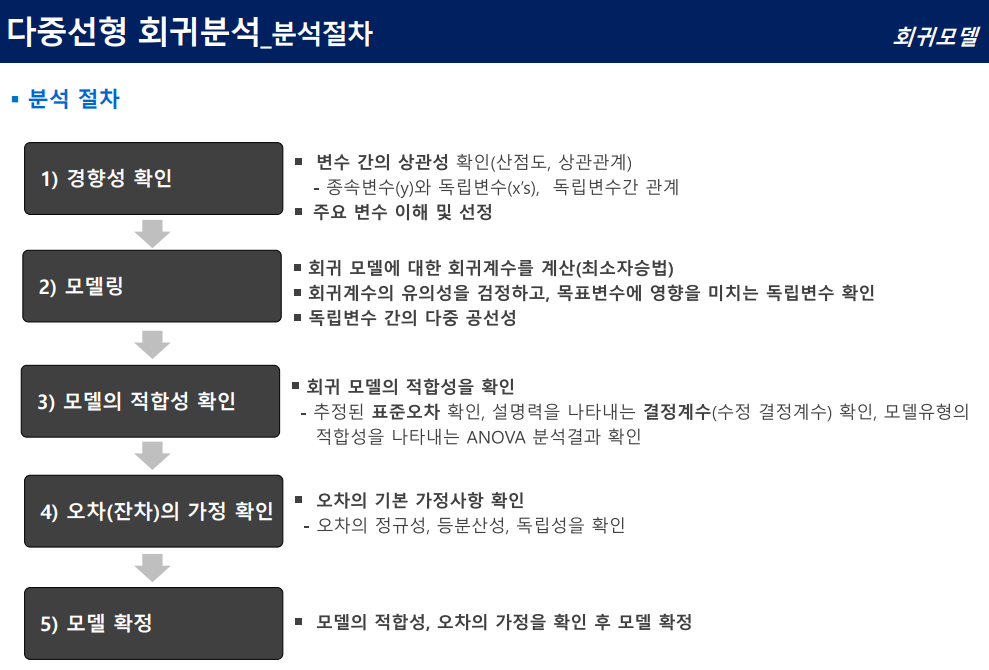

In [ ]:
# Remove some usless columns
df1 = df1.drop(['Over18', 'EmployeeNumber', 'StandardHours', 'EmployeeCount'], axis = 1)

# LogisticRegression

## LogisticRegression (Baseline)

In [ ]:
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# 그래프 속성 설정
mpl.rc("font", family = 'Malgun Gothic')
mpl.rc("axes", unicode_minus = False)

In [ ]:
# 결측치 확인
df1.isna().sum()

  # JOB 변수의 결측치는 "Other"로 대체
    # df_raw["JOB"].fillna("Other", inplace = True)
  # 숫자형 변수의 결측치는 해당 변수의 평균값으로 대체
    # df_raw.fillna(df_raw.mean(), inplace=True

In [ ]:
# 데이터 전처리 - 학습/평가데이터 분리
df1_train, df1_test = train_test_split(df1, test_size = 0.3, random_state = 1)
print("train set size: {}".format(df1_train.shape))
print("test set size: {}".format(df1_test.shape))

train set size: (1029, 33)
test set size: (441, 33)


In [ ]:
df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
# from_formula 함수를 이용하여 변수 역할 지정
# 범주형 변수도 때려 넣을 수 있음, 단 C를 이용해서 표시해야 함 - C 왜 안돼지?!
# 단순히 설명변수 갯수를 적게 넣으니까 돌아간다..? (operands could not be broadcast together with shapes (1029, 2) (1029,) 에러 났었음 )
# 종속변수는 0,1로 바꿔야 하고, 독립변수는 C로 넣으면 된다!!! 
log_model = Logit.from_formula("""Attrition ~ Age + C(BusinessTravel) + DailyRate + C(Department) + DistanceFromHome + Education + C(EducationField) 
+ EnvironmentSatisfaction + C(Gender) + HourlyRate + JobInvolvement +  JobLevel + C(JobRole) + JobSatisfaction + C(MaritalStatus) + 
MonthlyIncome + MonthlyRate + NumCompaniesWorked + C(OverTime) + PercentSalaryHike + PerformanceRating +  RelationshipSatisfaction + 
StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany+ YearsInCurrentRole +
YearsSinceLastPromotion + YearsWithCurrManager""", df1_train) 

In [ ]:
# from_formula 함수를 이용하여 변수 역할 지정
# 범주형 변수도 때려 넣을 수 있음, 단 C를 이용해서 표시해야 함 
# 단순히 설명변수 갯수를 적게 넣으니까 돌아간다..? (operands could not be broadcast together with shapes (1029, 2) (1029,) 에러 났었음 )
log_model = Logit.from_formula("""C(Attrition) ~ Age + C(BusinessTravel)""", df1_train)

#### ver 1 (X & Y transformed to 0,1)
+ """Attrition ~ Age + BusinessTravel + + DailyRate + Department + DistanceFromHome + Education + EducationField + EnvironmentSatisfaction + Gender + HourlyRate + JobInvolvement +  JobLevel + JobRole + JobSatisfaction + MaritalStatus + MonthlyIncome + MonthlyRate + NumCompaniesWorked + OverTime + PercentSalaryHike + PerformanceRating +  RelationshipSatisfaction +StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany+ YearsInCurrentRole +YearsSinceLastPromotion + YearsWithCurrManager"""

In [ ]:
log_result = log_model.fit()

         Current function value: 0.284042
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
print(log_result.summary())

                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1029
Model:                          Logit   Df Residuals:                      984
Method:                           MLE   Df Model:                           44
Date:                Tue, 07 Jun 2022   Pseudo R-squ.:                  0.3427
Time:                        08:17:14   Log-Likelihood:                -292.28
converged:                      False   LL-Null:                       -444.65
Covariance Type:            nonrobust   LLR p-value:                 1.056e-40
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                 -10.8234    705.482     -0.015      0.988   -1393.542    1371.895
C(BusinessTravel)[T.Travel_Frequently]      

#### ver 2 (Y: int-bi, X: Categorical)

+ """Attrition ~ Age + C(BusinessTravel) + DailyRate + C(Department) + DistanceFromHome + Education + C(EducationField) + EnvironmentSatisfaction + C(Gender) + HourlyRate + JobInvolvement +  JobLevel + C(JobRole) + JobSatisfaction + C(MaritalStatus) + 
MonthlyIncome + MonthlyRate + NumCompaniesWorked + C(OverTime) + PercentSalaryHike + PerformanceRating +  RelationshipSatisfaction + 
StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany+ YearsInCurrentRole +
YearsSinceLastPromotion + YearsWithCurrManager""""""

In [ ]:
log_result = log_model.fit()

         Current function value: 0.284042
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
print(log_result.summary())

                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1029
Model:                          Logit   Df Residuals:                      984
Method:                           MLE   Df Model:                           44
Date:                Tue, 07 Jun 2022   Pseudo R-squ.:                  0.3427
Time:                        08:17:27   Log-Likelihood:                -292.28
converged:                      False   LL-Null:                       -444.65
Covariance Type:            nonrobust   LLR p-value:                 1.056e-40
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                 -10.8234    705.482     -0.015      0.988   -1393.542    1371.895
C(BusinessTravel)[T.Travel_Frequently]      

In [ ]:
y_pred = log_result.predict(df1_train)
y_pred_class = (y_pred > 0.5).astype(int)
print("training accuracy: {0:.3f}".format(accuracy_score(df1_train['Attrition'], y_pred_class)))
y_pred = log_result.predict(df1_test)
y_pred_class = (y_pred > 0.5).astype(int)
print("test accuracy: {0:.3f}".format(accuracy_score(df1_test['Attrition'], y_pred_class)))

training accuracy: 0.898
test accuracy: 0.866


In [ ]:
print(np.exp(log_result.params))

NameError: ignored

In [ ]:
print("Confusion Matrix: \n{}".format(confusion_matrix(df1_test['Attrition'], y_pred_class)))

Confusion Matrix: 
[[351  13]
 [ 46  31]]


##### Result check

In [ ]:
print("Classification Report: ", classification_report(df1_test['Attrition'], y_pred_class))

Classification Report:                precision    recall  f1-score   support

           0       0.88      0.96      0.92       364
           1       0.70      0.40      0.51        77

    accuracy                           0.87       441
   macro avg       0.79      0.68      0.72       441
weighted avg       0.85      0.87      0.85       441



#### ver 3 (delete variables)

- Based upon ver 2

In [ ]:
# Department, Education field, Education, Hourly Rate, Job level, Performancerate(3,4밖에 없음) 삭제
# JobRole, MatritalStatus 는 항목별로 유의미할 수 있어 남겨놓기로 함 

log_model = Logit.from_formula("""Attrition ~ Age + C(BusinessTravel) + DailyRate + DistanceFromHome 
+ EnvironmentSatisfaction + C(Gender) + JobInvolvement +  JobLevel + C(JobRole) + JobSatisfaction + C(MaritalStatus) + 
MonthlyIncome + MonthlyRate + NumCompaniesWorked + C(OverTime) + PercentSalaryHike + RelationshipSatisfaction + 
StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany+ YearsInCurrentRole +
YearsSinceLastPromotion + YearsWithCurrManager""", df1_train) 

In [ ]:
log_result = log_model.fit()

Optimization terminated successfully.
         Current function value: 0.292777
         Iterations 8


In [ ]:
print(log_result.summary())

                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1029
Model:                          Logit   Df Residuals:                      994
Method:                           MLE   Df Model:                           34
Date:                Tue, 07 Jun 2022   Pseudo R-squ.:                  0.3225
Time:                        12:12:41   Log-Likelihood:                -301.27
converged:                       True   LL-Null:                       -444.65
Covariance Type:            nonrobust   LLR p-value:                 9.223e-42
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  1.3794      1.329      1.038      0.299      -1.225       3.984
C(BusinessTravel)[T.Travel_Frequently]     1.93

In [ ]:
y_pred = log_result.predict(df1_train)
y_pred_class = (y_pred > 0.5).astype(int)
print("training accuracy: {0:.3f}".format(accuracy_score(df1_train['Attrition'], y_pred_class)))
y_pred = log_result.predict(df1_test)
y_pred_class = (y_pred > 0.5).astype(int)
print("test accuracy: {0:.3f}".format(accuracy_score(df1_test['Attrition'], y_pred_class)))

training accuracy: 0.892
test accuracy: 0.868


##### Result check  - "1" raised

In [ ]:
print("Classification Report: ", classification_report(df1_test['Attrition'], y_pred_class))

Classification Report:                precision    recall  f1-score   support

           0       0.89      0.96      0.92       364
           1       0.71      0.42      0.52        77

    accuracy                           0.87       441
   macro avg       0.80      0.69      0.72       441
weighted avg       0.86      0.87      0.85       441



#### ver 4 (delete variables-2)

- 성능 오히려 더 낮아짐

In [ ]:
# JobRole, MatritalStatus 도 제거
log_model = Logit.from_formula("""Attrition ~ Age + C(BusinessTravel) + DailyRate + DistanceFromHome 
+ EnvironmentSatisfaction + C(Gender) + JobInvolvement +  JobLevel + JobSatisfaction +  
MonthlyIncome + MonthlyRate + NumCompaniesWorked + C(OverTime) + PercentSalaryHike + RelationshipSatisfaction + 
StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany+ YearsInCurrentRole +
YearsSinceLastPromotion + YearsWithCurrManager""", df1_train) 

In [ ]:
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.314257
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1029
Model:                          Logit   Df Residuals:                     1004
Method:                           MLE   Df Model:                           24
Date:                Mon, 06 Jun 2022   Pseudo R-squ.:                  0.2727
Time:                        04:12:15   Log-Likelihood:                -323.37
converged:                       True   LL-Null:                       -444.65
Covariance Type:            nonrobust   LLR p-value:                 4.914e-38
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  3.5760   

In [ ]:
y_pred = log_result.predict(df1_train)
y_pred_class = (y_pred > 0.5).astype(int)
print("training accuracy: {0:.3f}".format(accuracy_score(df1_train['Attrition'], y_pred_class)))
y_pred = log_result.predict(df1_test)
y_pred_class = (y_pred > 0.5).astype(int)
print("test accuracy: {0:.3f}".format(accuracy_score(df1_test['Attrition'], y_pred_class)))

training accuracy: 0.880
test accuracy: 0.850


##### Result check - X

In [ ]:
print("Classification Report: ", classification_report(df1_test['Attrition'], y_pred_class))

Classification Report:                precision    recall  f1-score   support

           0       0.87      0.96      0.91       364
           1       0.65      0.31      0.42        77

    accuracy                           0.85       441
   macro avg       0.76      0.64      0.67       441
weighted avg       0.83      0.85      0.83       441



#### ver 5 (editing variables)

In [ ]:
# MarritalStatus - Single/Non-single
# JobRole - Laboratory Technicican, Sales representative / Non -
df1.loc[df1['MaritalStatus'] == 'Single', 'Single_label'] = 1
df1.loc[df1['MaritalStatus'] != 'Single', 'Single_label'] = 0

In [ ]:
df1.loc[(df1['JobRole'] == 'Laboratory Technician')|(df1['JobRole'] == 'Sales Representative'), 'JobRole_label'] = 1
df1.loc[(df1['JobRole'] != 'Laboratory Technician')&(df1['JobRole'] != 'Sales Representative'), 'JobRole_label'] = 0

In [ ]:
df1.JobRole_label.value_counts() # 1: attrition

0.0    1128
1.0     342
Name: JobRole_label, dtype: int64

In [ ]:
df1.Single_label.value_counts() # 1: attrition

0.0    1000
1.0     470
Name: Single_label, dtype: int64

In [ ]:
log_model = Logit.from_formula("""Attrition ~ Age + C(BusinessTravel) + DailyRate + DistanceFromHome 
+ EnvironmentSatisfaction + C(Gender) + JobInvolvement + JobRole_label + Single_label + JobLevel + JobSatisfaction +  
MonthlyIncome + MonthlyRate + NumCompaniesWorked + C(OverTime) + PercentSalaryHike + RelationshipSatisfaction + 
StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany+ YearsInCurrentRole +
YearsSinceLastPromotion + YearsWithCurrManager""", df1_train) 

In [ ]:
print(np.exp(log_result.params))

Intercept                                 10.920378
C(BusinessTravel)[T.Travel_Frequently]     6.633862
C(BusinessTravel)[T.Travel_Rarely]         3.397143
C(Gender)[T.Male]                          1.436498
C(OverTime)[T.Yes]                         6.094756
Age                                        0.972450
DailyRate                                  0.999605
DistanceFromHome                           1.055756
EnvironmentSatisfaction                    0.655860
JobInvolvement                             0.623328
JobRole_label                              2.747672
Single_label                               2.152708
JobLevel                                   1.297637
JobSatisfaction                            0.754973
MonthlyIncome                              0.999932
MonthlyRate                                1.000005
NumCompaniesWorked                         1.157244
PercentSalaryHike                          0.969033
RelationshipSatisfaction                   0.843874
StockOptionL

In [ ]:
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.302460
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1029
Model:                          Logit   Df Residuals:                     1002
Method:                           MLE   Df Model:                           26
Date:                Tue, 07 Jun 2022   Pseudo R-squ.:                  0.3000
Time:                        08:29:15   Log-Likelihood:                -311.23
converged:                       True   LL-Null:                       -444.65
Covariance Type:            nonrobust   LLR p-value:                 8.333e-42
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  2.3906   

In [ ]:
y_pred = log_result.predict(df1_train)
y_pred_class = (y_pred > 0.5).astype(int)
print("training accuracy: {0:.3f}".format(accuracy_score(df1_train['Attrition'], y_pred_class)))
y_pred = log_result.predict(df1_test)
y_pred_class = (y_pred > 0.5).astype(int)
print("test accuracy: {0:.3f}".format(accuracy_score(df1_test['Attrition'], y_pred_class)))

training accuracy: 0.891
test accuracy: 0.871


##### Result check - raised slightly, "1" raised

In [ ]:
print("Classification Report: ", classification_report(df1_test['Attrition'], y_pred_class))

Classification Report:                precision    recall  f1-score   support

           0       0.89      0.96      0.92       364
           1       0.71      0.44      0.54        77

    accuracy                           0.87       441
   macro avg       0.80      0.70      0.73       441
weighted avg       0.86      0.87      0.86       441



### ver5-5 (editing variables - mistake covered)

In [ ]:
# MarritalStatus - Single/Non-single
# JobRole - Laboratory Technicican, Sales representative / Non -
df1.loc[df1['MaritalStatus'] == 'Single', 'Single_label'] = 1
df1.loc[df1['MaritalStatus'] != 'Single', 'Single_label'] = 0

In [ ]:
cond1 = df1['JobRole'] == 'Human Resources'
cond2 = df1['JobRole'] == 'Laboratory Technician'
cond3 = df1['JobRole'] == 'Sales Executive'
cond4 = df1['JobRole'] == 'Sales Representative'

In [ ]:
df1.Single_label.value_counts()

0.0    1000
1.0     470
Name: Single_label, dtype: int64

In [ ]:
df1.loc[cond1|cond2|cond3|cond4, 'JobRole_label'] = 1
df1.loc[~(cond1|cond2|cond3|cond4), 'JobRole_label'] = 0

In [ ]:
df1.JobRole_label.value_counts()

0.0    750
1.0    720
Name: JobRole_label, dtype: int64

In [ ]:
log_model = Logit.from_formula("""Attrition ~ Age + C(BusinessTravel) + DailyRate + DistanceFromHome 
+ EnvironmentSatisfaction + C(Gender) + JobInvolvement + JobLevel + JobSatisfaction +  
MonthlyIncome + MonthlyRate + NumCompaniesWorked + C(OverTime) + PercentSalaryHike + RelationshipSatisfaction + 
StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany+ YearsInCurrentRole +
YearsSinceLastPromotion + YearsWithCurrManager + JobRole_label + Single_label""", df1_train) 

In [ ]:
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.297544
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1029
Model:                          Logit   Df Residuals:                     1002
Method:                           MLE   Df Model:                           26
Date:                Thu, 23 Jun 2022   Pseudo R-squ.:                  0.3114
Time:                        02:40:17   Log-Likelihood:                -306.17
converged:                       True   LL-Null:                       -444.65
Covariance Type:            nonrobust   LLR p-value:                 8.243e-44
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  2.3381   

##### LogisticRegression result 해석
**Coefficient(로지스틱 회귀계수, 추정된 파라미터 값)**
- ex. Single_label 의 Coefficient = 0.8358; 
- 나머지 변수를 고정시킨 상태에서 'Single_label' 가 1인 경우의 오즈는 그렇지 않은 집단보다 (이혼/결혼) 오즈가 0.8 증가한다.
- 즉, Single_label 이 1일 경우 그렇지 않을 경우에 비해 퇴사할 확률이 80% 증가한다?
- 이 값은 변수를 넣고 빼면서 모델마다 계속 변한다. 

In [ ]:
print(np.exp(log_result.params))

Intercept                                 10.361180
C(BusinessTravel)[T.Travel_Frequently]     6.910754
C(BusinessTravel)[T.Travel_Rarely]         3.382215
C(Gender)[T.Male]                          1.407019
C(OverTime)[T.Yes]                         6.139318
Age                                        0.970359
DailyRate                                  0.999598
DistanceFromHome                           1.054174
EnvironmentSatisfaction                    0.659884
JobInvolvement                             0.636502
JobLevel                                   0.826158
JobSatisfaction                            0.756582
MonthlyIncome                              0.999994
MonthlyRate                                1.000008
NumCompaniesWorked                         1.142287
PercentSalaryHike                          0.972153
RelationshipSatisfaction                   0.828665
StockOptionLevel                           0.788512
TotalWorkingYears                          0.952787
TrainingTime

##### Result check - accuracy, f1-score, over-fitting 

In [ ]:
y_pred = log_result.predict(df1_train)
y_pred_class = (y_pred > 0.5).astype(int)
print("training accuracy: {0:.3f}".format(accuracy_score(df1_train['Attrition'], y_pred_class)))
y_pred = log_result.predict(df1_test)
y_pred_class = (y_pred > 0.5).astype(int)
print("test accuracy: {0:.3f}".format(accuracy_score(df1_test['Attrition'], y_pred_class)))

print("Classification Report: ", classification_report(df1_test['Attrition'], y_pred_class))

training accuracy: 0.889
test accuracy: 0.875
Classification Report:                precision    recall  f1-score   support

           0       0.89      0.97      0.93       364
           1       0.74      0.44      0.55        77

    accuracy                           0.88       441
   macro avg       0.82      0.70      0.74       441
weighted avg       0.86      0.88      0.86       441



##### Sales Representative/Executive visu.

In [ ]:
df1.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

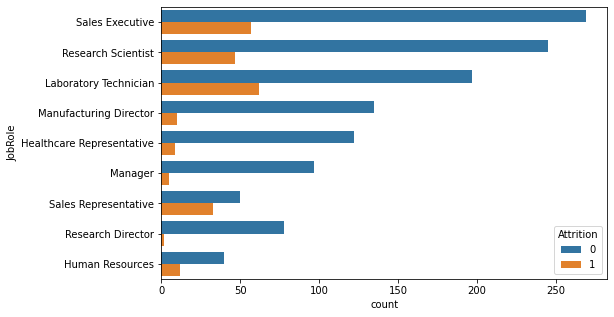

In [ ]:
plt.figure(figsize = (8,5))
sns.countplot(data=df1, y = 'JobRole', hue = 'Attrition')

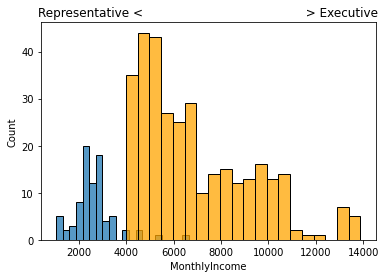

In [ ]:
plt.title('Representative <                                          > Executive')
sns.histplot(data=df1.loc[df1['JobRole'] == 'Sales Representative'], x = 'MonthlyIncome', bins =20)
sns.histplot(data=df1.loc[df1['JobRole'] == 'Sales Executive'], x = 'MonthlyIncome',  color = 'orange', bins = 20)

### ver 5 (upsampling  - SMOTE)

In [ ]:
df1_train

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Single,Single_label,JobRole_label
99,44,0,Non-Travel,489,Research & Development,23,3,Medical,2,Male,...,17,3,4,3,2,1,2,NaN,0.0,1.0
785,40,0,Travel_Rarely,1492,Research & Development,20,4,Technical Degree,1,Male,...,14,6,3,11,10,11,1,NaN,0.0,0.0
918,51,0,Travel_Frequently,237,Sales,9,3,Life Sciences,4,Male,...,31,5,2,29,10,11,10,NaN,0.0,0.0
1335,39,0,Travel_Rarely,835,Research & Development,19,4,Other,4,Male,...,7,2,3,2,2,2,2,NaN,0.0,0.0
1182,36,0,Non-Travel,894,Research & Development,1,4,Medical,4,Female,...,4,6,3,3,2,1,2,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,33,0,Travel_Frequently,827,Research & Development,1,4,Other,3,Female,...,6,2,3,6,5,1,2,NaN,0.0,0.0
905,29,0,Travel_Rarely,694,Research & Development,1,3,Life Sciences,4,Female,...,9,2,2,7,7,1,7,NaN,0.0,0.0
1096,40,0,Travel_Rarely,898,Human Resources,6,2,Medical,3,Male,...,21,2,3,21,7,7,7,1.0,1.0,0.0
235,43,0,Travel_Rarely,1034,Sales,16,3,Marketing,4,Female,...,22,3,3,17,13,1,9,NaN,0.0,0.0


In [ ]:
# Transform non-numerical into numerical col
from sklearn.preprocessing import LabelEncoder

for column in df1.columns:
  if df1[column].dtype == np.number:
    continue
  df1[column] = LabelEncoder().fit_transform(df1[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  """


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 0)

In [ ]:
df1_train

In [ ]:
Y = df1_train['Attrition']
X = df1_train[['Age', 'BusinessTravel', 'DailyRate', 'DistanceFromHome','EnvironmentSatisfaction','Gender',
               'JobInvolvement','JobRole_label','Single_label','JobLevel','JobSatisfaction','MonthlyIncome',
               'MonthlyRate','NumCompaniesWorked','OverTime','PercentSalaryHike','RelationshipSatisfaction',
               'StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany',
               'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

In [ ]:
X.describe()

In [ ]:
X_df1_train_over, y_df1_train_over = smote.fit_resample(X, Y)

In [ ]:
df1_train_over  = pd.concat([X_df1_train_over,y_df1_train_over], axis=1)

In [ ]:
df1_train_over.Attrition.value_counts()

0    869
1    869
Name: Attrition, dtype: int64

In [ ]:
log_model = Logit.from_formula("""Attrition ~ Age + BusinessTravel + DailyRate + DistanceFromHome 
+ EnvironmentSatisfaction + Gender + JobInvolvement + JobRole_label + Single_label + JobLevel + JobSatisfaction +  
MonthlyIncome + MonthlyRate + NumCompaniesWorked + OverTime + PercentSalaryHike + RelationshipSatisfaction + 
StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany+ YearsInCurrentRole +
YearsSinceLastPromotion + YearsWithCurrManager""", df1_train_over) 

In [ ]:
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.387495
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1738
Model:                          Logit   Df Residuals:                     1712
Method:                           MLE   Df Model:                           25
Date:                Mon, 06 Jun 2022   Pseudo R-squ.:                  0.4410
Time:                        05:40:10   Log-Likelihood:                -673.47
converged:                       True   LL-Null:                       -1204.7
Covariance Type:            nonrobust   LLR p-value:                3.208e-208
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    7.6629      0.539     14.209      0.000       6.606

In [ ]:
y_pred = log_result.predict(df1_train_over)
y_pred_class = (y_pred > 0.5).astype(int)
print("training accuracy: {0:.3f}".format(accuracy_score(df1_train_over['Attrition'], y_pred_class)))
y_pred = log_result.predict(df1_test)
y_pred_class = (y_pred > 0.5).astype(int)
print("test accuracy: {0:.3f}".format(accuracy_score(df1_test['Attrition'], y_pred_class)))

training accuracy: 0.823
test accuracy: 0.791


##### Result check - X

In [ ]:
print("Classification Report: ", classification_report(df1_test['Attrition'], y_pred_class))

Classification Report:                precision    recall  f1-score   support

           0       0.92      0.82      0.87       364
           1       0.43      0.65      0.52        77

    accuracy                           0.79       441
   macro avg       0.68      0.74      0.69       441
weighted avg       0.83      0.79      0.81       441



## LogisticRegression (Baseline2 - all int.)

#### test_size = 0.3이 가장 높음

In [ ]:
# 데이터 전처리 - 학습/평가데이터 분리; test = 0.3, labelencoder
df1_train, df1_test = train_test_split(df1, test_size = 0.3, random_state = 1)
print("train set size: {}".format(df1_train.shape))
print("test set size: {}".format(df1_test.shape))

log_model = Logit.from_formula("""Attrition ~ Age + BusinessTravel + DailyRate + Department + DistanceFromHome + Education + EducationField + 
+ EnvironmentSatisfaction + Gender + HourlyRate + JobInvolvement +  JobLevel + JobRole + JobSatisfaction + MaritalStatus + 
MonthlyIncome + MonthlyRate + NumCompaniesWorked + OverTime + PercentSalaryHike + PerformanceRating +  RelationshipSatisfaction + 
StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany+ YearsInCurrentRole +
YearsSinceLastPromotion + YearsWithCurrManager""", df1_train) 

log_result = log_model.fit()
print(log_result.summary())

train set size: (1029, 31)
test set size: (441, 31)
Optimization terminated successfully.
         Current function value: 0.308027
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1029
Model:                          Logit   Df Residuals:                      998
Method:                           MLE   Df Model:                           30
Date:                Wed, 13 Jul 2022   Pseudo R-squ.:                  0.2872
Time:                        11:18:06   Log-Likelihood:                -316.96
converged:                       True   LL-Null:                       -444.65
Covariance Type:            nonrobust   LLR p-value:                 1.385e-37
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   

In [ ]:
y_pred = log_result.predict(df1_train)
y_pred_class = (y_pred > 0.5).astype(int)
print("training accuracy: {0:.3f}".format(accuracy_score(df1_train['Attrition'], y_pred_class)))
y_pred = log_result.predict(df1_test)
y_pred_class = (y_pred > 0.5).astype(int)
print("test accuracy: {0:.3f}".format(accuracy_score(df1_test['Attrition'], y_pred_class)))

training accuracy: 0.887
test accuracy: 0.864


In [ ]:
# 데이터 전처리 - 학습/평가데이터 분리; test = 0.5, labelencoder
df1_train, df1_test = train_test_split(df1, test_size = 0.5, random_state = 1)
print("train set size: {}".format(df1_train.shape))
print("test set size: {}".format(df1_test.shape))

log_model = Logit.from_formula("""Attrition ~ Age + BusinessTravel + DailyRate + Department + DistanceFromHome + Education + EducationField + 
+ EnvironmentSatisfaction + Gender + HourlyRate + JobInvolvement +  JobLevel + JobRole + JobSatisfaction + MaritalStatus + 
MonthlyIncome + MonthlyRate + NumCompaniesWorked + OverTime + PercentSalaryHike + PerformanceRating +  RelationshipSatisfaction + 
StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany+ YearsInCurrentRole +
YearsSinceLastPromotion + YearsWithCurrManager""", df1_train) 

log_result = log_model.fit()
# print(log_result.summary())

# Accuracy 확인
y_pred = log_result.predict(df1_train)
y_pred_class = (y_pred > 0.5).astype(int)
print("training accuracy: {0:.3f}".format(accuracy_score(df1_train['Attrition'], y_pred_class)))
y_pred = log_result.predict(df1_test)
y_pred_class = (y_pred > 0.5).astype(int)
print("test accuracy: {0:.3f}".format(accuracy_score(df1_test['Attrition'], y_pred_class)))

train set size: (735, 31)
test set size: (735, 31)
Optimization terminated successfully.
         Current function value: 0.307149
         Iterations 7
training accuracy: 0.888
test accuracy: 0.860


In [ ]:
# 데이터 전처리 - 학습/평가데이터 분리; test = 0.2, labelencoder
df1_train, df1_test = train_test_split(df1, test_size = 0.2, random_state = 1)
print("train set size: {}".format(df1_train.shape))
print("test set size: {}".format(df1_test.shape))

log_model = Logit.from_formula("""Attrition ~ Age + BusinessTravel + DailyRate + Department + DistanceFromHome + Education + EducationField + 
+ EnvironmentSatisfaction + Gender + HourlyRate + JobInvolvement +  JobLevel + JobRole + JobSatisfaction + MaritalStatus + 
MonthlyIncome + MonthlyRate + NumCompaniesWorked + OverTime + PercentSalaryHike + PerformanceRating +  RelationshipSatisfaction + 
StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany+ YearsInCurrentRole +
YearsSinceLastPromotion + YearsWithCurrManager""", df1_train) 

log_result = log_model.fit()
# print(log_result.summary())

# Accuracy 확인
y_pred = log_result.predict(df1_train)
y_pred_class = (y_pred > 0.5).astype(int)
print("training accuracy: {0:.3f}".format(accuracy_score(df1_train['Attrition'], y_pred_class)))
y_pred = log_result.predict(df1_test)
y_pred_class = (y_pred > 0.5).astype(int)
print("test accuracy: {0:.3f}".format(accuracy_score(df1_test['Attrition'], y_pred_class)))

train set size: (1176, 31)
test set size: (294, 31)
Optimization terminated successfully.
         Current function value: 0.303334
         Iterations 7
training accuracy: 0.886
test accuracy: 0.850


In [ ]:
# 데이터 전처리 - 학습/평가데이터 분리; test = 0.4, labelencoder
df1_train, df1_test = train_test_split(df1, test_size = 0.4, random_state = 1)
print("train set size: {}".format(df1_train.shape))
print("test set size: {}".format(df1_test.shape))

log_model = Logit.from_formula("""Attrition ~ Age + BusinessTravel + DailyRate + Department + DistanceFromHome + Education + EducationField + 
+ EnvironmentSatisfaction + Gender + HourlyRate + JobInvolvement +  JobLevel + JobRole + JobSatisfaction + MaritalStatus + 
MonthlyIncome + MonthlyRate + NumCompaniesWorked + OverTime + PercentSalaryHike + PerformanceRating +  RelationshipSatisfaction + 
StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany+ YearsInCurrentRole +
YearsSinceLastPromotion + YearsWithCurrManager""", df1_train) 

log_result = log_model.fit()
# print(log_result.summary())

# Accuracy 확인
y_pred = log_result.predict(df1_train)
y_pred_class = (y_pred > 0.5).astype(int)
print("training accuracy: {0:.3f}".format(accuracy_score(df1_train['Attrition'], y_pred_class)))
y_pred = log_result.predict(df1_test)
y_pred_class = (y_pred > 0.5).astype(int)
print("test accuracy: {0:.3f}".format(accuracy_score(df1_test['Attrition'], y_pred_class)))

train set size: (882, 31)
test set size: (588, 31)
Optimization terminated successfully.
         Current function value: 0.298357
         Iterations 7
training accuracy: 0.895
test accuracy: 0.852


## LogisticRegression (Baseline2 - Y:0,1/X:cat)

In [ ]:
df1.Attrition = df1.Attrition.replace({'Yes':1, 'No':0})

In [ ]:
# Remove some usless columns
df1 = df1.drop(['Over18', 'EmployeeNumber', 'StandardHours', 'EmployeeCount'], axis = 1)

In [ ]:
# 데이터 전처리 - 학습/평가데이터 분리; test = 0.3, only Y is bi.
df1_train, df1_test = train_test_split(df1, test_size = 0.3, random_state = 1)
print("train set size: {}".format(df1_train.shape))
print("test set size: {}".format(df1_test.shape))

log_model = Logit.from_formula("""Attrition ~ 
Age + C(BusinessTravel) + DailyRate + C(Department) 
+ DistanceFromHome + Education + C(EducationField) + EnvironmentSatisfaction 
+ C(Gender) + HourlyRate + JobInvolvement +  JobLevel 
+ C(JobRole) + JobSatisfaction + C(MaritalStatus) + MonthlyIncome 
+ MonthlyRate + NumCompaniesWorked + C(OverTime) + PercentSalaryHike 
+ PerformanceRating +  RelationshipSatisfaction + StockOptionLevel + TotalWorkingYears 
+ TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany+ YearsInCurrentRole 
+ YearsSinceLastPromotion + YearsWithCurrManager""", df1_train) 

log_result = log_model.fit()
# print(log_result.summary())

# Accuracy 확인
y_pred = log_result.predict(df1_train)
y_pred_class = (y_pred > 0.5).astype(int)
print("training accuracy: {0:.3f}".format(accuracy_score(df1_train['Attrition'], y_pred_class)))
y_pred = log_result.predict(df1_test)
y_pred_class = (y_pred > 0.5).astype(int)
print("test accuracy: {0:.3f}".format(accuracy_score(df1_test['Attrition'], y_pred_class)))

train set size: (1029, 31)
test set size: (441, 31)
         Current function value: 0.284042
         Iterations: 35
training accuracy: 0.898
test accuracy: 0.866


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


## LogisticRegression (Baseline2 + Feature remove)

In [ ]:
# 데이터 전처리 - 학습/평가데이터 분리; test = 0.3, only Y is bi.
df1_train, df1_test = train_test_split(df1, test_size = 0.3, random_state = 1)
print("train set size: {}".format(df1_train.shape))
print("test set size: {}".format(df1_test.shape))

# Department, Education, EducationField, Hourly Rate, Performancerate(3,4밖에 없음) 삭제
log_model = Logit.from_formula("""Attrition ~ 
Age + C(BusinessTravel) + DailyRate + 
DistanceFromHome + EnvironmentSatisfaction + 
C(Gender) + JobInvolvement + JobLevel + 
C(JobRole) + JobSatisfaction + C(MaritalStatus) + MonthlyIncome + 
MonthlyRate + NumCompaniesWorked + C(OverTime) + PercentSalaryHike + 
RelationshipSatisfaction + StockOptionLevel + TotalWorkingYears + 
TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany+ YearsInCurrentRole +
YearsSinceLastPromotion + YearsWithCurrManager""", df1_train) 

log_result = log_model.fit()
# print(log_result.summary())

# Accuracy 확인
y_pred = log_result.predict(df1_train)
y_pred_class = (y_pred > 0.5).astype(int)
print("training accuracy: {0:.3f}".format(accuracy_score(df1_train['Attrition'], y_pred_class)))
y_pred = log_result.predict(df1_test)
y_pred_class = (y_pred > 0.5).astype(int)
print("test accuracy: {0:.3f}".format(accuracy_score(df1_test['Attrition'], y_pred_class)))

train set size: (1029, 31)
test set size: (441, 31)
Optimization terminated successfully.
         Current function value: 0.292777
         Iterations 8
training accuracy: 0.892
test accuracy: 0.868


In [ ]:
print(log_result.summary())

                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1029
Model:                          Logit   Df Residuals:                      994
Method:                           MLE   Df Model:                           34
Date:                Wed, 13 Jul 2022   Pseudo R-squ.:                  0.3225
Time:                        11:42:22   Log-Likelihood:                -301.27
converged:                       True   LL-Null:                       -444.65
Covariance Type:            nonrobust   LLR p-value:                 9.223e-42
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  1.3794      1.329      1.038      0.299      -1.225       3.984
C(BusinessTravel)[T.Travel_Frequently]     1.93

In [ ]:
# MonthlyIncome, MonthlyRate, PercentSalaryHike 삭제

# 데이터 전처리 - 학습/평가데이터 분리; test = 0.3, only Y is bi.
df1_train, df1_test = train_test_split(df1, test_size = 0.3, random_state = 1)
print("train set size: {}".format(df1_train.shape))
print("test set size: {}".format(df1_test.shape))

# Department, Education, EducationField, Hourly Rate, Performancerate(3,4밖에 없음) 삭제
  # MonthlyIncome, MonthlyRate, PercentSalaryHike 삭제
log_model = Logit.from_formula("""Attrition ~ 
Age + C(BusinessTravel) + DailyRate + 
DistanceFromHome + EnvironmentSatisfaction + 
C(Gender) + JobInvolvement + JobLevel + 
C(JobRole) + JobSatisfaction + C(MaritalStatus) + 
NumCompaniesWorked + C(OverTime) + 
RelationshipSatisfaction + StockOptionLevel + TotalWorkingYears + 
TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany+ YearsInCurrentRole +
YearsSinceLastPromotion + YearsWithCurrManager""", df1_train) 

log_result = log_model.fit()
# print(log_result.summary())

# Accuracy 확인
y_pred = log_result.predict(df1_train)
y_pred_class = (y_pred > 0.5).astype(int)
print("training accuracy: {0:.3f}".format(accuracy_score(df1_train['Attrition'], y_pred_class)))
y_pred = log_result.predict(df1_test)
y_pred_class = (y_pred > 0.5).astype(int)
print("test accuracy: {0:.3f}".format(accuracy_score(df1_test['Attrition'], y_pred_class)))

train set size: (1029, 31)
test set size: (441, 31)
Optimization terminated successfully.
         Current function value: 0.293614
         Iterations 8
training accuracy: 0.892
test accuracy: 0.871


In [ ]:
# MonthlyIncome, MonthlyRate, PercentSalaryHike,  StockOptionLevel, TotalWorkingYears 삭제

# 데이터 전처리 - 학습/평가데이터 분리; test = 0.3, only Y is bi.
df1_train, df1_test = train_test_split(df1, test_size = 0.3, random_state = 1)
print("train set size: {}".format(df1_train.shape))
print("test set size: {}".format(df1_test.shape))

# Department, Education, EducationField, Hourly Rate, Performancerate(3,4밖에 없음) 삭제
  # MonthlyIncome, MonthlyRate, PercentSalaryHike
    # StockOptionLevel, TotalWorkingYears 삭제
log_model = Logit.from_formula("""Attrition ~ 
Age + C(BusinessTravel) + DailyRate + 
DistanceFromHome + EnvironmentSatisfaction + 
C(Gender) + JobInvolvement + JobLevel + 
C(JobRole) + JobSatisfaction + C(MaritalStatus) + 
NumCompaniesWorked + C(OverTime) + 
RelationshipSatisfaction + 
TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany+ YearsInCurrentRole +
YearsSinceLastPromotion + YearsWithCurrManager""", df1_train) 

log_result = log_model.fit()
# print(log_result.summary())

# Accuracy 확인
y_pred = log_result.predict(df1_train)
y_pred_class = (y_pred > 0.5).astype(int)
print("training accuracy: {0:.3f}".format(accuracy_score(df1_train['Attrition'], y_pred_class)))
y_pred = log_result.predict(df1_test)
y_pred_class = (y_pred > 0.5).astype(int)
print("test accuracy: {0:.3f}".format(accuracy_score(df1_test['Attrition'], y_pred_class)))

train set size: (1029, 31)
test set size: (441, 31)
Optimization terminated successfully.
         Current function value: 0.295591
         Iterations 8
training accuracy: 0.887
test accuracy: 0.868


In [ ]:
# MonthlyIncome, MonthlyRate, PercentSalaryHike 삭제 기준 summary 다시 확인
print(log_result.summary())

                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1029
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                           31
Date:                Wed, 13 Jul 2022   Pseudo R-squ.:                  0.3205
Time:                        11:46:49   Log-Likelihood:                -302.13
converged:                       True   LL-Null:                       -444.65
Covariance Type:            nonrobust   LLR p-value:                 7.201e-43
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  0.9496      1.211      0.784      0.433      -1.424       3.323
C(BusinessTravel)[T.Travel_Frequently]     1.95

In [ ]:
# PercentSalaryHike삭제 Summary 확인 후, JobLevel삭제

# 데이터 전처리 - 학습/평가데이터 분리; test = 0.3, only Y is bi.
df1_train, df1_test = train_test_split(df1, test_size = 0.3, random_state = 1)
print("train set size: {}".format(df1_train.shape))
print("test set size: {}".format(df1_test.shape))

# Department, Education, EducationField, Hourly Rate, Performancerate(3,4밖에 없음) 삭제
  # MonthlyIncome, MonthlyRate, PercentSalaryHike 삭제
   # Joblevel 삭제
log_model = Logit.from_formula("""Attrition ~ 
Age + C(BusinessTravel) + DailyRate + 
DistanceFromHome + EnvironmentSatisfaction + 
C(Gender) + JobInvolvement +  
C(JobRole) + JobSatisfaction + C(MaritalStatus) + 
NumCompaniesWorked + C(OverTime) + 
RelationshipSatisfaction + StockOptionLevel + TotalWorkingYears + 
TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany+ YearsInCurrentRole +
YearsSinceLastPromotion + YearsWithCurrManager""", df1_train) 

log_result = log_model.fit()
# print(log_result.summary())

# Accuracy 확인
y_pred = log_result.predict(df1_train)
y_pred_class = (y_pred > 0.5).astype(int)
print("training accuracy: {0:.3f}".format(accuracy_score(df1_train['Attrition'], y_pred_class)))
y_pred = log_result.predict(df1_test)
y_pred_class = (y_pred > 0.5).astype(int)
print("test accuracy: {0:.3f}".format(accuracy_score(df1_test['Attrition'], y_pred_class)))

train set size: (1029, 31)
test set size: (441, 31)
Optimization terminated successfully.
         Current function value: 0.293838
         Iterations 8
training accuracy: 0.894
test accuracy: 0.875


In [ ]:
# Joblevel까지 삭제한 버전의 summary 확인
print(log_result.summary())

                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1029
Model:                          Logit   Df Residuals:                      998
Method:                           MLE   Df Model:                           30
Date:                Wed, 13 Jul 2022   Pseudo R-squ.:                  0.3200
Time:                        11:48:45   Log-Likelihood:                -302.36
converged:                       True   LL-Null:                       -444.65
Covariance Type:            nonrobust   LLR p-value:                 2.841e-43
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  1.2163      1.146      1.061      0.289      -1.030       3.463
C(BusinessTravel)[T.Travel_Frequently]     1.95

In [ ]:
# JobLevel삭제 summary 확인 후, StockOptionLevel 삭제  - 그대로임

# 데이터 전처리 - 학습/평가데이터 분리; test = 0.3, only Y is bi.
df1_train, df1_test = train_test_split(df1, test_size = 0.3, random_state = 1)
print("train set size: {}".format(df1_train.shape))
print("test set size: {}".format(df1_test.shape))

# Department, Education, EducationField, Hourly Rate, Performancerate(3,4밖에 없음) 삭제
  # MonthlyIncome, MonthlyRate, PercentSalaryHike 삭제
   # Joblevel 삭제
log_model = Logit.from_formula("""Attrition ~ 
Age + C(BusinessTravel) + DailyRate + 
DistanceFromHome + EnvironmentSatisfaction + 
C(Gender) + JobInvolvement +  
C(JobRole) + JobSatisfaction + C(MaritalStatus) + 
NumCompaniesWorked + C(OverTime) + 
RelationshipSatisfaction + TotalWorkingYears + 
TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany+ YearsInCurrentRole +
YearsSinceLastPromotion + YearsWithCurrManager""", df1_train) 

log_result = log_model.fit()
# print(log_result.summary())

# Accuracy 확인
y_pred = log_result.predict(df1_train)
y_pred_class = (y_pred > 0.5).astype(int)
print("training accuracy: {0:.3f}".format(accuracy_score(df1_train['Attrition'], y_pred_class)))
y_pred = log_result.predict(df1_test)
y_pred_class = (y_pred > 0.5).astype(int)
print("test accuracy: {0:.3f}".format(accuracy_score(df1_test['Attrition'], y_pred_class)))

train set size: (1029, 31)
test set size: (441, 31)
Optimization terminated successfully.
         Current function value: 0.294516
         Iterations 8
training accuracy: 0.893
test accuracy: 0.875


In [ ]:
print(log_result.summary())

                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1029
Model:                          Logit   Df Residuals:                      999
Method:                           MLE   Df Model:                           29
Date:                Wed, 13 Jul 2022   Pseudo R-squ.:                  0.3184
Time:                        11:50:56   Log-Likelihood:                -303.06
converged:                       True   LL-Null:                       -444.65
Covariance Type:            nonrobust   LLR p-value:                 1.686e-43
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  0.9206      1.118      0.823      0.410      -1.272       3.113
C(BusinessTravel)[T.Travel_Frequently]     1.95

## LogisticRegression (Data Preprocessing - Feature adjustment; Added Variable/ test=0.3)

In [ ]:
# Variable added - Single_label, Jobrole_label

# MarritalStatus - Single/Non-single
df1.loc[df1['MaritalStatus'] == 'Single', 'Single_label'] = 1
df1.loc[df1['MaritalStatus'] != 'Single', 'Single_label'] = 0

# JobRole - Human Resources, Laboratory Technician, Sales representative, Sales Executive
cond1 = df1['JobRole'] == 'Human Resources'
cond2 = df1['JobRole'] == 'Laboratory Technician'
cond3 = df1['JobRole'] == 'Sales Representative'
cond4 = df1['JobRole'] == 'Sales Executive'

df1.loc[(cond1)|(cond2)|(cond3)|(cond4), 'Jobrole_label'] = 1
df1.loc[~((cond1)|(cond2)|(cond3)|(cond4)), 'Jobrole_label'] = 0

In [ ]:
df1.Single_label = df1.Single_label.astype(int)
df1.Jobrole_label = df1.Jobrole_label.astype(int)

In [ ]:
df1.Single_label.value_counts()

0    1000
1     470
Name: Single_label, dtype: int64

In [ ]:
df1.Jobrole_label.value_counts()

0    750
1    720
Name: Jobrole_label, dtype: int64

In [ ]:
# JobLevel삭제 summary 확인 후, StockOptionLevel 삭제 버전
# Matrital / Jobrole Cat 변수 삭제  
# Single_label, Jobrole_label 추가

# 데이터 전처리 - 학습/평가데이터 분리; test = 0.3, only Y is bi.
df1_train, df1_test = train_test_split(df1, test_size = 0.3, random_state = 1)
print("train set size: {}".format(df1_train.shape))
print("test set size: {}".format(df1_test.shape))

# Department, Education, EducationField, Hourly Rate, Performancerate(3,4밖에 없음) 삭제
  # MonthlyIncome, MonthlyRate, PercentSalaryHike 삭제
   # Joblevel 삭제
log_model = Logit.from_formula("""Attrition ~ 
Age + C(BusinessTravel) + DailyRate + 
DistanceFromHome + EnvironmentSatisfaction + 
C(Gender) + JobInvolvement +  
JobSatisfaction + 
NumCompaniesWorked + C(OverTime) + 
RelationshipSatisfaction + TotalWorkingYears + 
TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany+ YearsInCurrentRole +
YearsSinceLastPromotion + YearsWithCurrManager + 
Single_label + Jobrole_label""", df1_train) 

log_result = log_model.fit()
# print(log_result.summary())

# Accuracy 확인
y_pred = log_result.predict(df1_train)
y_pred_class = (y_pred > 0.5).astype(int)
print("training accuracy: {0:.3f}".format(accuracy_score(df1_train['Attrition'], y_pred_class)))
y_pred = log_result.predict(df1_test)
y_pred_class = (y_pred > 0.5).astype(int)
print("test accuracy: {0:.3f}".format(accuracy_score(df1_test['Attrition'], y_pred_class)))

train set size: (1029, 33)
test set size: (441, 33)
Optimization terminated successfully.
         Current function value: 0.299685
         Iterations 8
training accuracy: 0.892
test accuracy: 0.875


In [ ]:
print(log_result.summary())

                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1029
Model:                          Logit   Df Residuals:                     1007
Method:                           MLE   Df Model:                           21
Date:                Wed, 13 Jul 2022   Pseudo R-squ.:                  0.3065
Time:                        12:10:36   Log-Likelihood:                -308.38
converged:                       True   LL-Null:                       -444.65
Covariance Type:            nonrobust   LLR p-value:                 1.179e-45
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  1.6021      1.015      1.578      0.115      -0.388       3.592
C(BusinessTravel)[T.Travel_Frequently]     1.95

In [ ]:
# Dailyrate삭제 - X 

# 데이터 전처리 - 학습/평가데이터 분리; test = 0.3, only Y is bi.
df1_train, df1_test = train_test_split(df1, test_size = 0.3, random_state = 1)
print("train set size: {}".format(df1_train.shape))
print("test set size: {}".format(df1_test.shape))

# Department, Education, EducationField, Hourly Rate, Performancerate(3,4밖에 없음) 삭제
  # MonthlyIncome, MonthlyRate, PercentSalaryHike 삭제
   # Joblevel 삭제
    # MaritalStatus, Jobrol Categorical 변수 삭제
      # Single_label 추가, Jobrole_label 추가
        # DailyRate삭제

log_model = Logit.from_formula("""Attrition ~ 
Age + C(BusinessTravel) + 
DistanceFromHome + EnvironmentSatisfaction + 
C(Gender) + JobInvolvement +  
JobSatisfaction + 
NumCompaniesWorked + C(OverTime) + 
RelationshipSatisfaction + TotalWorkingYears + 
TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany+ YearsInCurrentRole +
YearsSinceLastPromotion + YearsWithCurrManager + 
Single_label + Jobrole_label""", df1_train) 

log_result = log_model.fit()
# print(log_result.summary())

# Accuracy 확인
y_pred = log_result.predict(df1_train)
y_pred_class = (y_pred > 0.5).astype(int)
print("training accuracy: {0:.3f}".format(accuracy_score(df1_train['Attrition'], y_pred_class)))
y_pred = log_result.predict(df1_test)
y_pred_class = (y_pred > 0.5).astype(int)
print("test accuracy: {0:.3f}".format(accuracy_score(df1_test['Attrition'], y_pred_class)))

train set size: (1029, 33)
test set size: (441, 33)
Optimization terminated successfully.
         Current function value: 0.300867
         Iterations 8
training accuracy: 0.891
test accuracy: 0.873


In [ ]:
# Dailyrate삭제 복원하고, Gender 삭제 

# 데이터 전처리 - 학습/평가데이터 분리; test = 0.3, only Y is bi.
df1_train, df1_test = train_test_split(df1, test_size = 0.3, random_state = 1)
print("train set size: {}".format(df1_train.shape))
print("test set size: {}".format(df1_test.shape))

# Department, Education, EducationField, Hourly Rate, Performancerate(3,4밖에 없음) 삭제
  # MonthlyIncome, MonthlyRate, PercentSalaryHike 삭제
   # Joblevel 삭제
    # MaritalStatus, Jobrol Categorical 변수 삭제
      # Single_label 추가, Jobrole_label 추가
        # DailyRate삭제 - 돌려놓고
          # Gender 삭제

log_model = Logit.from_formula("""Attrition ~ 
Age + C(BusinessTravel) + DailyRate +
DistanceFromHome + EnvironmentSatisfaction + 
JobInvolvement +  
JobSatisfaction + 
NumCompaniesWorked + C(OverTime) + 
RelationshipSatisfaction + TotalWorkingYears + 
TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany+ YearsInCurrentRole +
YearsSinceLastPromotion + YearsWithCurrManager + 
Single_label + Jobrole_label""", df1_train) 

log_result = log_model.fit()
# print(log_result.summary())

# Accuracy 확인
y_pred = log_result.predict(df1_train)
y_pred_class = (y_pred > 0.5).astype(int)
print("training accuracy: {0:.3f}".format(accuracy_score(df1_train['Attrition'], y_pred_class)))
y_pred = log_result.predict(df1_test)
y_pred_class = (y_pred > 0.5).astype(int)
print("test accuracy: {0:.3f}".format(accuracy_score(df1_test['Attrition'], y_pred_class)))

train set size: (1029, 33)
test set size: (441, 33)
Optimization terminated successfully.
         Current function value: 0.300959
         Iterations 8
training accuracy: 0.895
test accuracy: 0.873


In [ ]:
# 더이상 삭제하면 안될 듯, DailyRate이랑 Gender은 복원
# JobLevel삭제 summary 확인 후, StockOptionLevel 삭제 버전
# Matrital / Jobrole Cat 변수 삭제  
# Single_label, Jobrole_label 추가

# 데이터 전처리 - 학습/평가데이터 분리; test = 0.3, only Y is bi.
df1_train, df1_test = train_test_split(df1, test_size = 0.3, random_state = 1)
print("train set size: {}".format(df1_train.shape))
print("test set size: {}".format(df1_test.shape))

# Department, Education, EducationField, Hourly Rate, Performancerate(3,4밖에 없음) 삭제
  # MonthlyIncome, MonthlyRate, PercentSalaryHike 삭제
   # Joblevel 삭제
log_model = Logit.from_formula("""Attrition ~ 
Age + C(BusinessTravel) + DailyRate + 
DistanceFromHome + EnvironmentSatisfaction + 
C(Gender) + JobInvolvement +  
JobSatisfaction + 
NumCompaniesWorked + C(OverTime) + 
RelationshipSatisfaction + TotalWorkingYears + 
TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany+ YearsInCurrentRole +
YearsSinceLastPromotion + YearsWithCurrManager + 
Single_label + Jobrole_label""", df1_train) 

log_result = log_model.fit()
# print(log_result.summary())

# Accuracy 확인
y_pred = log_result.predict(df1_train)
y_pred_class = (y_pred > 0.5).astype(int)
print("training accuracy: {0:.3f}".format(accuracy_score(df1_train['Attrition'], y_pred_class)))
y_pred = log_result.predict(df1_test)
y_pred_class = (y_pred > 0.5).astype(int)
print("test accuracy: {0:.3f}".format(accuracy_score(df1_test['Attrition'], y_pred_class)))

train set size: (1029, 33)
test set size: (441, 33)
Optimization terminated successfully.
         Current function value: 0.299685
         Iterations 8
training accuracy: 0.892
test accuracy: 0.875


## LogisticRegression (Threshold Tuning)

In [ ]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scikit-learn

SyntaxError: ignored

In [ ]:
log_model.predict_proba(df1_test)

AttributeError: ignored

# SupportVectorMachine

In [ ]:
# SVM은 Preprocessing 으로 정규화가 필요함

## SupportVectorMachine (Baseline)

In [ ]:
# 학습에 사용될 알고리즘 
from sklearn.tree     import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# 학습/검증 데이터 분할 / 매개변수 튜닝 / 교차검증 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# 평가 
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:
df1 = pd.read_csv('ibm_hr_attrition.csv')
df1.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [ ]:
# Transform non-numerical into numerical col
from sklearn.preprocessing import LabelEncoder

for column in df1.columns:
  if df1[column].dtype == np.number:
    continue
  df1[column] = LabelEncoder().fit_transform(df1[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  """


In [ ]:
# Remove some usless columns
df1 = df1.drop(['Over18', 'EmployeeNumber', 'StandardHours', 'EmployeeCount'], axis = 1)

# Split the data (X,y)
X = df1.drop(columns = ['Attrition'])
y = df1['Attrition']

# train, test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = 0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1029, 30)
(441, 30)
(1029,)
(441,)


In [ ]:
# StandardScaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# scaling 진행 
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler= scaler.transform(X_test) # fit_transform 에서 사용한것과 똑같이 transform 

# feature names
feature_names = X_train.columns

# scaling 결과를 다시 변수에 저장
X_train_scaler = pd.DataFrame(X_train_scaler, columns = feature_names)
X_test_scaler = pd.DataFrame(X_test_scaler, columns = feature_names)

In [ ]:
# 모델을 객체로 선언
from sklearn.svm import SVC
model_svm = SVC(random_state= 1)
model_svm.fit(X_train_scaler, y_train)

SVC(random_state=1)

In [ ]:
# train dataset accuracy
print("학습용 데이터의 정확도: {:.3f}".format(model_svm.score(X_train_scaler, y_train)))
# test dataset accuracy
print("평가용 데이터의 정확도: {:.3f}".format(model_svm.score(X_test_scaler, y_test)))

학습용 데이터의 정확도: 0.916
평가용 데이터의 정확도: 0.862


## SupportVectorMachine (test data = 0.5)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, 
                                                    random_state = 0)

# StandardScaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# scaling 진행 
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler= scaler.transform(X_test) # fit_transform 에서 사용한것과 똑같이 transform 

# feature names
feature_names = X_train.columns

# scaling 결과를 다시 변수에 저장
X_train_scaler = pd.DataFrame(X_train_scaler, columns = feature_names)
X_test_scaler = pd.DataFrame(X_test_scaler, columns = feature_names)

# 모델을 객체로 선언
from sklearn.svm import SVC
model_svm = SVC(random_state= 1)
model_svm.fit(X_train_scaler, y_train)

# train dataset accuracy
print("학습용 데이터의 정확도: {:.3f}".format(model_svm.score(X_train_scaler, y_train)))
# test dataset accuracy
print("평가용 데이터의 정확도: {:.3f}".format(model_svm.score(X_test_scaler, y_test)))

학습용 데이터의 정확도: 0.916
평가용 데이터의 정확도: 0.871


## SupportVectorMachine (GridSearch)

In [ ]:
estimator = SVC(random_state = 1)

# parameter option range
  # 비선형이라 gamma까지, 선형이면 c만 하면 됨
param_grid = {'C': [1, 10, 11, 12, 15, 18, 20,30, 50, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10,15, 25, 50, 100]}

  # C(cost) : 이론에서 배운 주요 파라미터로써 어느 정도의 오차를 허용할지에 대한 파라미터입니다.
  # kernel : 어떤 커널함수를 사용할지에 대한 파라미터입니다. 'linear', 'sigmoid', 'rbf', 'poly'가 활용됩니다.
  # degree : 어느 차수까지의 다항차수로 분류를 할 지에 대한 파라미터입니다. 커널함수가 'poly' 일 때 사용됩니다.
  # gamma : 곡률 경계에 대한 파라미터입니다. 'rbf', 'poly', 'sigmoid'일 때 튜닝하는 값입니다.
  # coef0 : 상수값으로써 'poly', 'sigmoid'일 때 튜닝을 진행합니다.

# Optimal parameter (accuracy)
grid_svm = GridSearchCV(estimator, param_grid, scoring = 'accuracy', n_jobs = -1) # 기준, 병렬처리
grid_svm.fit(X_train_scaler, y_train)

# accuracy
print('best estimator model: {}'.format(grid_svm.best_estimator_))
print('best parameter: {}'.format(grid_svm.best_params_))
print('best score: {}'.format(grid_svm.best_score_.round(3)))

best estimator model: SVC(C=100, gamma=0.001, random_state=1)
best parameter: {'C': 100, 'gamma': 0.001}
best score: 0.876


#### <<0.879!!>>

In [ ]:
estimator = SVC(random_state = 1)

# parameter option range
  # 비선형이라 gamma까지, 선형이면 c만 하면 됨
param_grid = {'C': [0.001, 20,30, 50, 75, 100, 150], 'gamma': [0.001, 0.003, 0.005,0.025, 0.01, 0.1, 1, 25, 50, 100]}

  # C(cost) : 이론에서 배운 주요 파라미터로써 어느 정도의 오차를 허용할지에 대한 파라미터입니다.
  # kernel : 어떤 커널함수를 사용할지에 대한 파라미터입니다. 'linear', 'sigmoid', 'rbf', 'poly'가 활용됩니다.
  # degree : 어느 차수까지의 다항차수로 분류를 할 지에 대한 파라미터입니다. 커널함수가 'poly' 일 때 사용됩니다.
  # gamma : 곡률 경계에 대한 파라미터입니다. 'rbf', 'poly', 'sigmoid'일 때 튜닝하는 값입니다.
  # coef0 : 상수값으로써 'poly', 'sigmoid'일 때 튜닝을 진행합니다.

# Optimal parameter (accuracy)
grid_svm = GridSearchCV(estimator, param_grid, scoring = 'accuracy', n_jobs = -1) # 기준, 병렬처리
grid_svm.fit(X_train_scaler, y_train)

# accuracy
print('best estimator model: {}'.format(grid_svm.best_estimator_))
print('best parameter: {}'.format(grid_svm.best_params_))
print('best score: {}'.format(grid_svm.best_score_.round(4)))

best estimator model: SVC(C=20, gamma=0.003, random_state=1)
best parameter: {'C': 20, 'gamma': 0.003}
best score: 0.8785


In [ ]:
# 여기까지만 하겠음
estimator = SVC(random_state = 1)

# parameter option range
  # 비선형이라 gamma까지, 선형이면 c만 하면 됨
param_grid = {'C': [1, 5, 10, 20, 25, 30, 50, 75, 100, 150], 'gamma': [0.001, 0.002, 0.003, 0.11, 0.004, 0.005,0.025, 0.07, 0.022, 0.01, 0.1, 1, 20]}

  # C(cost) : 이론에서 배운 주요 파라미터로써 어느 정도의 오차를 허용할지에 대한 파라미터입니다.
  # kernel : 어떤 커널함수를 사용할지에 대한 파라미터입니다. 'linear', 'sigmoid', 'rbf', 'poly'가 활용됩니다.
  # degree : 어느 차수까지의 다항차수로 분류를 할 지에 대한 파라미터입니다. 커널함수가 'poly' 일 때 사용됩니다.
  # gamma : 곡률 경계에 대한 파라미터입니다. 'rbf', 'poly', 'sigmoid'일 때 튜닝하는 값입니다.
  # coef0 : 상수값으로써 'poly', 'sigmoid'일 때 튜닝을 진행합니다.

# Optimal parameter (accuracy)
grid_svm = GridSearchCV(estimator, param_grid, scoring = 'accuracy', n_jobs = -1) # 기준, 병렬처리
grid_svm.fit(X_train_scaler, y_train)

# accuracy
print('best estimator model: {}'.format(grid_svm.best_estimator_))
print('best parameter: {}'.format(grid_svm.best_params_))
print('best score: {}'.format(grid_svm.best_score_.round(4)))

best estimator model: SVC(C=10, gamma=0.004, random_state=1)
best parameter: {'C': 10, 'gamma': 0.004}
best score: 0.8785


## SupportVectorMachine (test data = 0.5, GridSearch)

#### << 0.882!!>>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, 
                                                    random_state = 0)

# StandardScaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# scaling 진행 
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler= scaler.transform(X_test) # fit_transform 에서 사용한것과 똑같이 transform 

# feature names
feature_names = X_train.columns

# scaling 결과를 다시 변수에 저장
X_train_scaler = pd.DataFrame(X_train_scaler, columns = feature_names)
X_test_scaler = pd.DataFrame(X_test_scaler, columns = feature_names)

# 모델을 객체로 선언
from sklearn.svm import SVC
model_svm = SVC(C = 30, gamma = 0.002, random_state= 1)
model_svm.fit(X_train_scaler, y_train)

# train dataset accuracy
print("학습용 데이터의 정확도: {:.3f}".format(model_svm.score(X_train_scaler, y_train)))
# test dataset accuracy
print("평가용 데이터의 정확도: {:.3f}".format(model_svm.score(X_test_scaler, y_test)))

학습용 데이터의 정확도: 0.894
평가용 데이터의 정확도: 0.882


## SupportVectorMachine(preprocessing + 0.5ratio + gridsearch)

In [ ]:
# based upon the insights from the LogisticRegression, I would like to adjust the dataframe
  # remove the following columns: 
    # Department, Education, EducationField, Hourly Rate, Performancerate(3,4밖에 없음)
    # MonthlyIncome, MonthlyRate, PercentSalaryHike 
    # Joblevel
    # MaritalStatus, Jobrol Categorical 
  # add the following columns (i will create):
    # Single_label +, Jobrole_label +

In [ ]:
# remove columns
df1 = df1.drop(columns = ['Over18', 'EmployeeNumber', 'StandardHours', 'EmployeeCount',
                    'Department', 'Education', 'EducationField', 'HourlyRate', 'PerformanceRating',
                    'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike',
                    'JobLevel'], axis = 1)
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,...,OverTime,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,1,2,Female,3,Sales Executive,4,...,Yes,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,8,3,Male,2,Research Scientist,2,...,No,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,2,4,Male,2,Laboratory Technician,3,...,Yes,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,3,4,Female,3,Research Scientist,3,...,Yes,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,2,1,Male,3,Laboratory Technician,2,...,No,4,1,6,3,3,2,2,2,2


In [ ]:
df1[df1['Department'] == 'Sales']

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
18,53,No,Travel_Rarely,1219,Sales,2,4,Life Sciences,1,23,...,3,80,0,31,3,3,25,8,3,7
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
27,42,No,Travel_Rarely,691,Sales,8,4,Marketing,1,35,...,4,80,1,10,2,3,9,7,4,2
29,46,No,Travel_Rarely,705,Sales,2,4,Marketing,1,38,...,4,80,0,22,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,45,No,Travel_Rarely,374,Sales,20,3,Life Sciences,1,2046,...,3,80,0,8,3,3,5,3,0,1
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,...,2,80,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,...,1,80,1,21,2,2,20,9,9,6
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0


In [ ]:
# Variable added - Single_label, Jobrole_label

# MarritalStatus - Single/Non-single
df1.loc[df1['MaritalStatus'] == 'Single', 'Single_label'] = 1
df1.loc[df1['MaritalStatus'] != 'Single', 'Single_label'] = 0

# JobRole - Human Resources, Laboratory Technician, Sales representative, Sales Executive
cond1 = df1['JobRole'] == 'Human Resources'
cond2 = df1['JobRole'] == 'Laboratory Technician'
cond3 = df1['JobRole'] == 'Sales Representative'
cond4 = df1['JobRole'] == 'Sales Executive'

df1.loc[(cond1)|(cond2)|(cond3)|(cond4), 'Jobrole_label'] = 1
df1.loc[~((cond1)|(cond2)|(cond3)|(cond4)), 'Jobrole_label'] = 0

In [ ]:
# remove JobRole and MaritalStatus
df1 = df1.drop(columns = ['JobRole', 'MaritalStatus'], axis = 1)

In [ ]:
df1.shape

(1470, 24)

In [ ]:
# make it numeric -> scaling 

  # Transform non-numerical into numerical col
from sklearn.preprocessing import LabelEncoder

for column in df1.columns:
  if df1[column].dtype == np.number:
    continue
  df1[column] = LabelEncoder().fit_transform(df1[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  import sys


In [ ]:
# Split the data (X,y)
X = df1.drop(columns = ['Attrition'])
y = df1['Attrition']

# train, test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, 
                                                    random_state = 0)

In [ ]:
# StandardScaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# scaling 진행 
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler= scaler.transform(X_test) # fit_transform 에서 사용한것과 똑같이 transform 

# feature names
feature_names = X_train.columns

# scaling 결과를 다시 변수에 저장
X_train_scaler = pd.DataFrame(X_train_scaler, columns = feature_names)
X_test_scaler = pd.DataFrame(X_test_scaler, columns = feature_names)

#### << 0.884!! >> (컬럼제거후)

In [ ]:
# 모델을 객체로 선언
from sklearn.svm import SVC
model_svm = SVC(C = 30, gamma = 0.002, random_state= 1) # 이전 GridSearch 값임
model_svm.fit(X_train_scaler, y_train)

# train dataset accuracy
print("학습용 데이터의 정확도: {:.3f}".format(model_svm.score(X_train_scaler, y_train)))
# test dataset accuracy
print("평가용 데이터의 정확도: {:.3f}".format(model_svm.score(X_test_scaler, y_test)))

학습용 데이터의 정확도: 0.876
평가용 데이터의 정확도: 0.884


GridSearch다시

In [ ]:
# GridSearch 다시! 
estimator = SVC(random_state = 1)

# parameter option range
  # 비선형이라 gamma까지, 선형이면 c만 하면 됨
param_grid = {'C': [0.001, 11, 15, 20,30, 50, 75, 100, 150], 'gamma': [0.001, 0.002, 0.003, 0.005,0.025, 0.01, 0.1, 1, 25, 50, 100]}

  # C(cost) : 이론에서 배운 주요 파라미터로써 어느 정도의 오차를 허용할지에 대한 파라미터입니다.
  # kernel : 어떤 커널함수를 사용할지에 대한 파라미터입니다. 'linear', 'sigmoid', 'rbf', 'poly'가 활용됩니다.
  # degree : 어느 차수까지의 다항차수로 분류를 할 지에 대한 파라미터입니다. 커널함수가 'poly' 일 때 사용됩니다.
  # gamma : 곡률 경계에 대한 파라미터입니다. 'rbf', 'poly', 'sigmoid'일 때 튜닝하는 값입니다.
  # coef0 : 상수값으로써 'poly', 'sigmoid'일 때 튜닝을 진행합니다.

# Optimal parameter (accuracy)
grid_svm = GridSearchCV(estimator, param_grid, scoring = 'accuracy', n_jobs = -1) # 기준, 병렬처리
grid_svm.fit(X_train_scaler, y_train)

# accuracy
print('best estimator model: {}'.format(grid_svm.best_estimator_))
print('best parameter: {}'.format(grid_svm.best_params_))
print('best score: {}'.format(grid_svm.best_score_.round(4)))

best estimator model: SVC(C=30, gamma=0.002, random_state=1)
best parameter: {'C': 30, 'gamma': 0.002}
best score: 0.8735


In [ ]:
estimator = SVC(random_state = 1)

# parameter option range
  # 비선형이라 gamma까지, 선형이면 c만 하면 됨
param_grid = {'C': [1, 10, 11, 12, 15, 18, 20,30, 50, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10,15, 25, 50, 100]}

  # C(cost) : 이론에서 배운 주요 파라미터로써 어느 정도의 오차를 허용할지에 대한 파라미터입니다.
  # kernel : 어떤 커널함수를 사용할지에 대한 파라미터입니다. 'linear', 'sigmoid', 'rbf', 'poly'가 활용됩니다.
  # degree : 어느 차수까지의 다항차수로 분류를 할 지에 대한 파라미터입니다. 커널함수가 'poly' 일 때 사용됩니다.
  # gamma : 곡률 경계에 대한 파라미터입니다. 'rbf', 'poly', 'sigmoid'일 때 튜닝하는 값입니다.
  # coef0 : 상수값으로써 'poly', 'sigmoid'일 때 튜닝을 진행합니다.

# Optimal parameter (accuracy)
grid_svm = GridSearchCV(estimator, param_grid, scoring = 'accuracy', n_jobs = -1) # 기준, 병렬처리
grid_svm.fit(X_train_scaler, y_train)

# accuracy
print('best estimator model: {}'.format(grid_svm.best_estimator_))
print('best parameter: {}'.format(grid_svm.best_params_))
print('best score: {}'.format(grid_svm.best_score_.round(3)))

best estimator model: SVC(C=100, gamma=0.001, random_state=1)
best parameter: {'C': 100, 'gamma': 0.001}
best score: 0.868


In [ ]:
estimator = SVC(random_state = 1)

# parameter option range
  # 비선형이라 gamma까지, 선형이면 c만 하면 됨
param_grid = {'C': [0.001, 20,30, 50, 75, 100, 150], 'gamma': [0.001, 0.003, 0.005,0.025, 0.01, 0.1, 1, 25, 50, 100]}

  # C(cost) : 이론에서 배운 주요 파라미터로써 어느 정도의 오차를 허용할지에 대한 파라미터입니다.
  # kernel : 어떤 커널함수를 사용할지에 대한 파라미터입니다. 'linear', 'sigmoid', 'rbf', 'poly'가 활용됩니다.
  # degree : 어느 차수까지의 다항차수로 분류를 할 지에 대한 파라미터입니다. 커널함수가 'poly' 일 때 사용됩니다.
  # gamma : 곡률 경계에 대한 파라미터입니다. 'rbf', 'poly', 'sigmoid'일 때 튜닝하는 값입니다.
  # coef0 : 상수값으로써 'poly', 'sigmoid'일 때 튜닝을 진행합니다.

# Optimal parameter (accuracy)
grid_svm = GridSearchCV(estimator, param_grid, scoring = 'accuracy', n_jobs = -1) # 기준, 병렬처리
grid_svm.fit(X_train_scaler, y_train)

# accuracy
print('best estimator model: {}'.format(grid_svm.best_estimator_))
print('best parameter: {}'.format(grid_svm.best_params_))
print('best score: {}'.format(grid_svm.best_score_.round(4)))

best estimator model: SVC(C=75, gamma=0.001, random_state=1)
best parameter: {'C': 75, 'gamma': 0.001}
best score: 0.868


# Pycaret

In [ ]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 15.3 MB/s 
     |████████████████████████████████| 1.3 MB 51.3 MB/s 
     |████████████████████████████████| 262 kB 47.8 MB/s 
     |████████████████████████████████| 1.7 MB 50.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 17.9 MB 459 kB/s 
     |████████████████████████████████| 6.8 MB 35.5 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 2.0 MB 47.7 MB/s 
     |████████████████████████████████| 125 kB 53.5 MB/s 
     |████████████████████████████████| 167 kB 48.5 MB/s 
     |████████████████████████████████| 10.4 MB 32.2 MB/s 
     |████████████████████████████████| 88 kB 7.3 MB/s 
     |████████████████████████████████|

In [ ]:
import yaml

In [ ]:
yaml.safe_load

<function yaml.safe_load>

In [ ]:
# Importing dataset
from pycaret.datasets import get_data
diabetes = get_data('diabetes')

# Importing module and initializing setup
from pycaret.classification import *
clf1 = setup(data = diabetes, target = 'Class variable')

# return best model
best = compare_models()

# return top 3 models based on 'Accuracy'
top3 = compare_models(n_select = 3)

# return best model based on AUC
best = compare_models(sort = 'AUC') #default is 'Accuracy'

# compare specific models
best_specific = compare_models(include = ['dt','rf','xgboost'])

# blacklist certain models
best_specific = compare_models(exclude = ['catboost', 'svm'])

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,04:56:38
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
Number of times pregnant,Categorical
Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Numeric
Diastolic blood pressure (mm Hg),Numeric
Triceps skin fold thickness (mm),Numeric
2-Hour serum insulin (mu U/ml),Numeric
Body mass index (weight in kg/(height in m)^2),Numeric
Diabetes pedigree function,Numeric
Age (years),Numeric
Class variable,Label


In [ ]:
best

# MultiLinearRegression

In [ ]:
pip install jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import jinja2